In [1]:

from scipy.special import boxcox1p

from pathlib import Path
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import KNNImputer
import mymodule as my
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import seaborn as sns
# Display all columns
pd.set_option('display.max_columns', None)
# Display all rows
pd.set_option('display.max_rows', None)



In [2]:
print(dir(my))

['KaggleApi', 'Path', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'download_kaggle_competition_data', 'download_kaggle_data', 'list_csv_files', 'load_competition_data', 'load_selected_csv_file', 'os', 'pd', 'zipfile']


# Loading Data

In [4]:
competition_name = 'house-prices-advanced-regression-techniques'  # Replace with your competition name
download_path = 'datasets'  # Replace with your desired download path

housing_data = my.load_competition_data(competition_name, download_path)

Unzipping datasets\house-prices-advanced-regression-techniques.zip...
Downloaded and extracted data to datasets
Available CSV files:
1. sample_submission.csv
2. test.csv
3. train.csv


Enter the number of the CSV file you want to load (1-3):  3


Loading data from datasets\train.csv...


### Take a Quick Look at the Data Structure

In [6]:
housing_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [7]:
housing_data.loc[(housing_data.GarageYrBlt.isnull()),['YearBuilt','YearRemodAdd','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageCond','GarageQual']]

YearBuilt  YearRemodAdd  GarageYrBlt GarageFinish  GarageCars  \
39         1955          1955          NaN          NaN           0   
48         1920          2008          NaN          NaN           0   
78         1968          1968          NaN          NaN           0   
88         1915          1982          NaN          NaN           0   
89         1994          1995          NaN          NaN           0   
99         1959          1959          NaN          NaN           0   
108        1919          2005          NaN          NaN           0   
125        1935          1982          NaN          NaN           0   
127        1930          1950          NaN          NaN           0   
140        1971          1971          NaN          NaN           0   
148        2004          2005          NaN          NaN           0   
155        1924          1950          NaN          NaN           0   
163        1956          1956          NaN          NaN           0   
165        1940          1999          NaN          NaN           0   
198        1912          1950          NaN          NaN           0   
210        1925          1950          NaN          NaN           0   
241        1945          1997          NaN          NaN           0   
250        1940          1966          NaN          NaN           0   
287        1971          1971          NaN          NaN           0   
291        1912          2000          NaN          NaN           0   
307        1920          1950          NaN          NaN           0   
375        1922          1950          NaN          NaN           0   
386        1910          1996          NaN          NaN           0   
393        1941          1950          NaN          NaN           0   
431        1920          1998          NaN          NaN           0   
434        1972          1972          NaN          NaN           0   
441        1955          1955          NaN          NaN           0   
464        1978          1978          NaN          NaN           0   
495        1920          1950          NaN          NaN           0   
520        1900          2000          NaN          NaN           0   
528        1920          2002          NaN          NaN           0   
533        1946          1950          NaN          NaN           0   
535        1910          1991          NaN          NaN           0   
562        1940          1969          NaN          NaN           0   
582        1990          1990          NaN          NaN           0   
613        2007          2007          NaN          NaN           0   
614        1972          1972          NaN          NaN           0   
620        1914          1950          NaN          NaN           0   
635        1914          1995          NaN          NaN           0   
636        1936          1950          NaN          NaN           0   
638        1910          1950          NaN          NaN           0   
649        1970          1970          NaN          NaN           0   
705        1930          1950          NaN          NaN           0   
710        1935          2003          NaN          NaN           0   
738        1987          1988          NaN          NaN           0   
750        1910          2004          NaN          NaN           0   
784        1914          2001          NaN          NaN           0   
826        1924          1950          NaN          NaN           0   
843        1961          1961          NaN          NaN           0   
921        1900          2003          NaN          NaN           0   
942        1977          1977          NaN          NaN           0   
954        1975          1975          NaN          NaN           0   
960        1958          2008          NaN          NaN           0   
968        1910          1950          NaN          NaN           0   
970        1949          1950          NaN          NaN           0   
976        1923          1958 

In [8]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### transformation of some numerical variables that are actually categorical.

In [10]:
def convert_to_string(df, columns):
    df[columns] = df[columns].astype(str)
    return df

In [11]:
num_to_categ_features = ['MSSubClass', 'OverallCond', 'OverallQual']#, 'YrSold', 'MoSold']

housing_data = convert_to_string(housing_data, columns = num_to_categ_features)

In [12]:
housing_data[ 'Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [13]:
housing_data.describe()

Id  LotFrontage        LotArea    YearBuilt  YearRemodAdd  \
count  1460.000000  1201.000000    1460.000000  1460.000000   1460.000000   
mean    730.500000    70.049958   10516.828082  1971.267808   1984.865753   
std     421.610009    24.284752    9981.264932    30.202904     20.645407   
min       1.000000    21.000000    1300.000000  1872.000000   1950.000000   
25%     365.750000    59.000000    7553.500000  1954.000000   1967.000000   
50%     730.500000    69.000000    9478.500000  1973.000000   1994.000000   
75%    1095.250000    80.000000   11601.500000  2000.000000   2004.000000   
max    1460.000000   313.000000  215245.000000  2010.000000   2010.000000   

        MasVnrArea   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  TotalBsmtSF  \
count  1452.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean    103.685262   443.639726    46.549315   567.240411  1057.429452   
std     181.066207   456.098091   161.319273   441.866955   438.705324   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000   223.000000   795.750000   
50%       0.000000   383.500000     0.000000   477.500000   991.500000   
75%     166.000000   712.250000     0.000000   808.000000  1298.250000   
max    1600.000000  5644.000000  1474.000000  2336.000000  6110.000000   

          1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  BsmtFullBath  \
count  1460.000000  1460.000000   1460.000000  1460.000000   1460.000000   
mean   1162.626712   346.992466      5.844521  1515.463699      0.425342   
std     386.587738   436.528436     48.623081   525.480383      0.518911   
min     334.000000     0.000000      0.000000   334.000000      0.000000   
25%     882.000000     0.000000      0.000000  1129.500000      0.000000   
50%    1087.000000     0.000000      0.000000  1464.000000      0.000000   
75%    1391.250000   728.000000      0.000000  1776.750000      1.000000   
max    4692.000000  2065.000000    572.000000  5642.000000      3.000000   

       BsmtHalfBath     FullBath     HalfBath  BedroomAbvGr  KitchenAbvGr  \
count   1460.000000  1460.000000  1460.000000   1460.000000   1460.000000   
mean       0.057534     1.565068     0.382877      2.866438      1.046575   
std        0.238753     0.550916     0.502885      0.815778      0.220338   
min        0.000000     0.000000     0.000000      0.000000      0.000000   
25%        0.000000     1.000000     0.000000      2.000000      1.000000   
50%        0.000000     2.000000     0.000000      3.000000      1.000000   
75%        0.000000     2.000000     1.000000      3.000000      1.000000   
max        2.000000     3.000000     2.000000      8.000000      3.000000   

       TotRmsAbvGrd   Fireplaces  GarageYrBlt   GarageCars   GarageArea  \
count   1460.000000  1460.000000  1379.000000  1460.000000  1460.000000   
mean       6.517808     0.613014  1978.506164     1.767123   472.980137   
std        1.625393     0.644666    24.689725     0.747315   213.804841   
min        2.000000     0.000000  1900.000000     0.000000     0.000000   
25%        5.000000     0.000000  1961.000000     1.000000   334.500000   
50%        6.000000     1.000000  1980.000000     2.000000   480.000000   
75%        7.000000     1.000000  2002.000000     2.000000   576.000000   
max       14.000000     3.000000  2010.000000     4.000000  1418.000000   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.00

In [14]:

IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

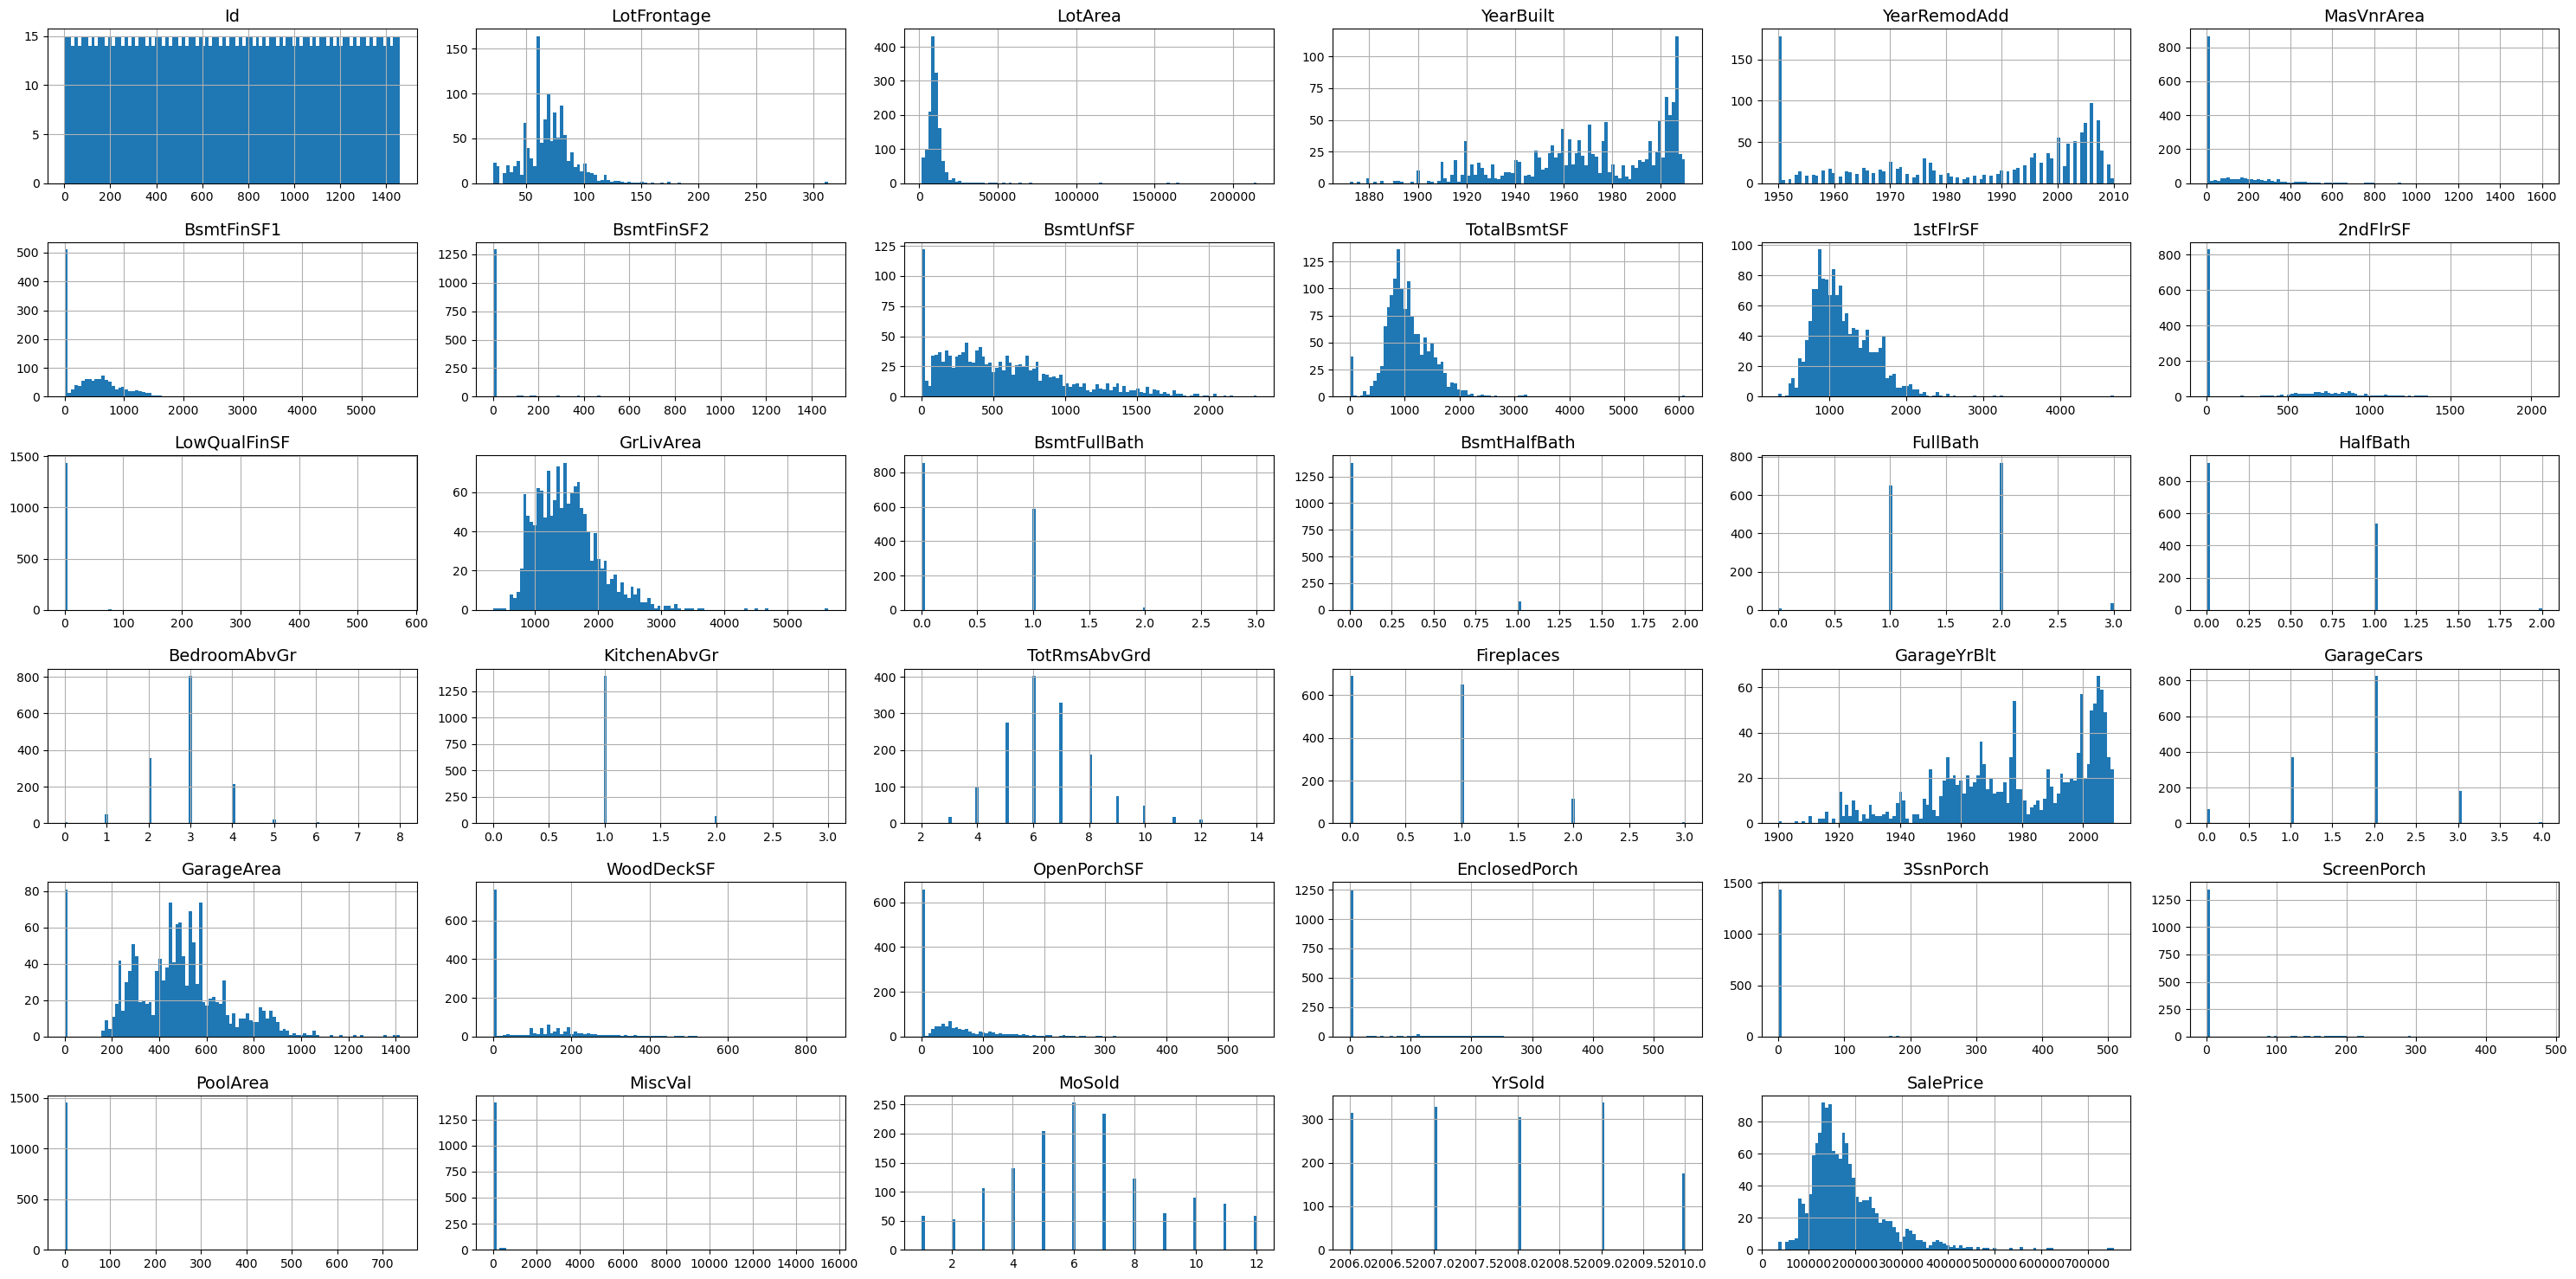

In [15]:


# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing_data.hist(bins=100, figsize=(30, 15))
save_fig("attribute_histogram_plots")  # extra code
plt.show()


<Axes: >

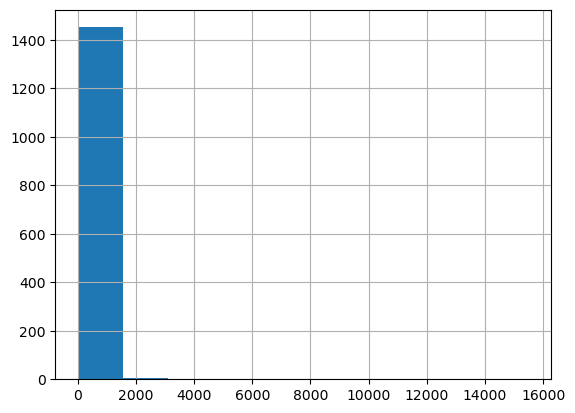

In [16]:
housing_data['MiscVal'].hist()

#### histogram to detect the distribution

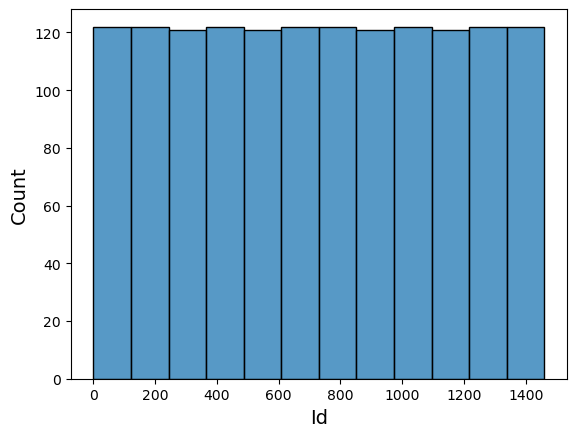

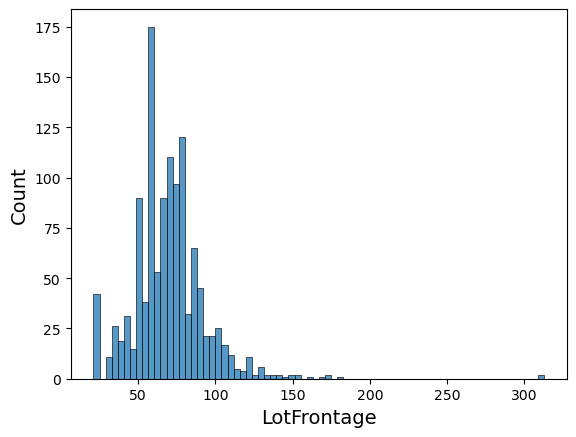

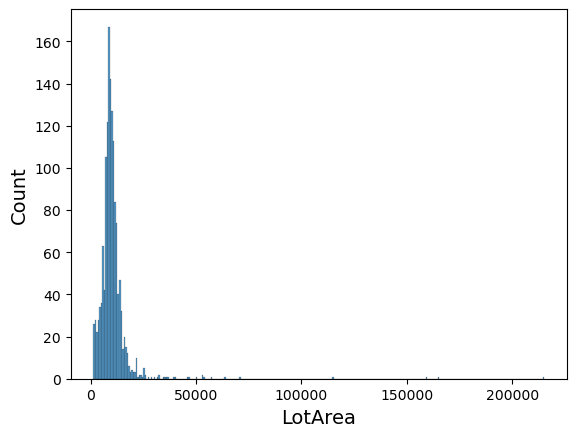

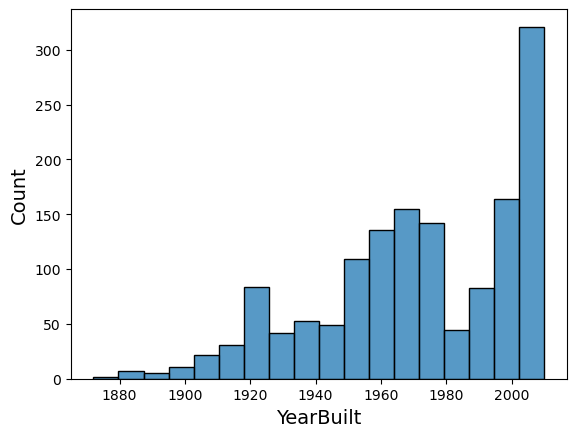

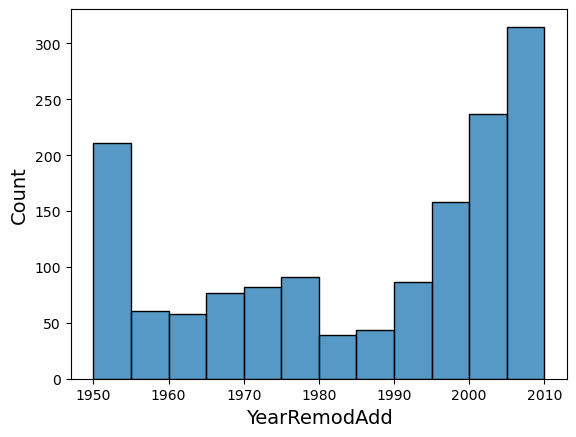

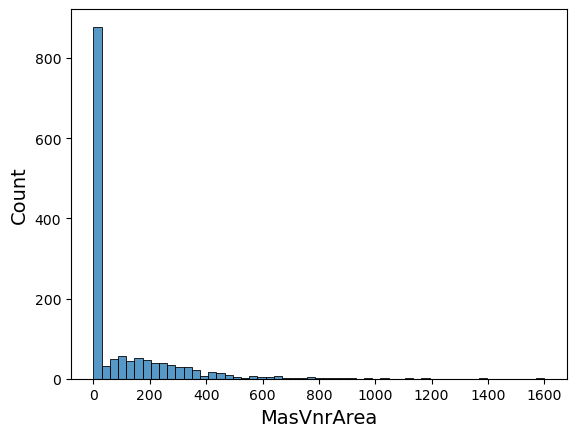

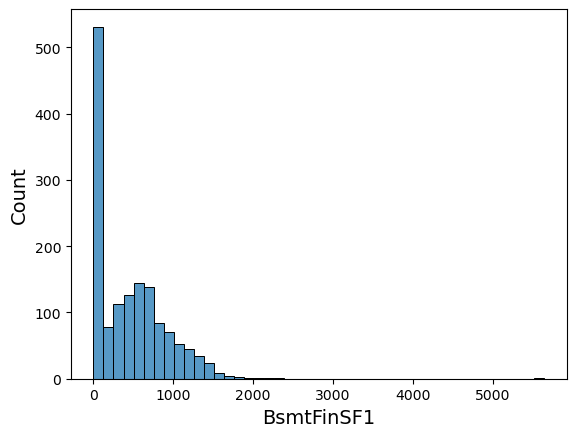

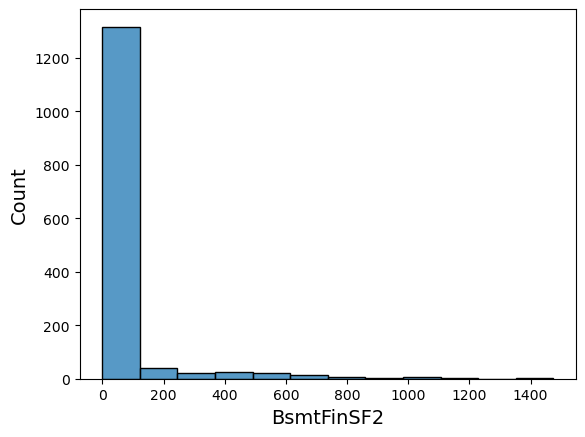

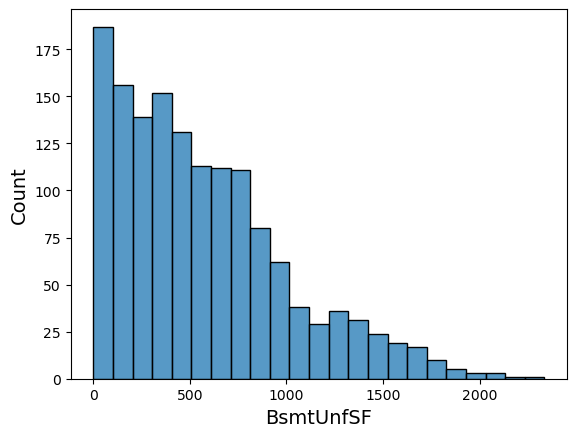

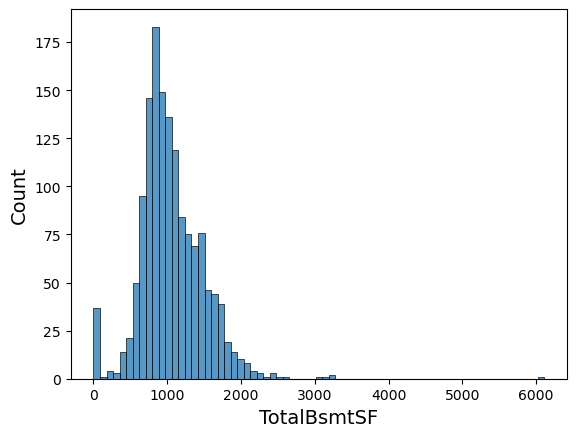

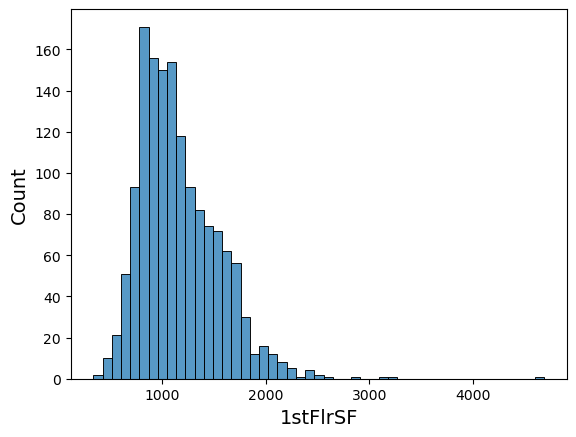

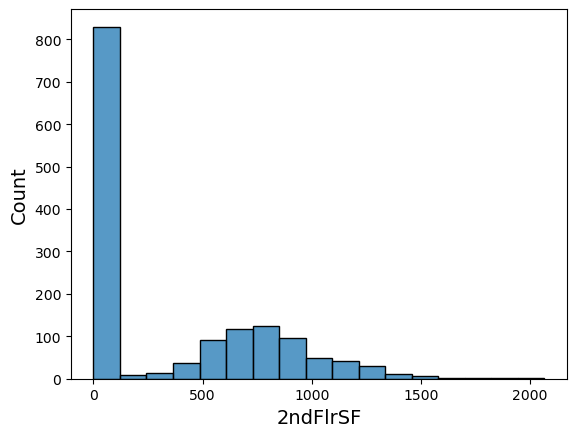

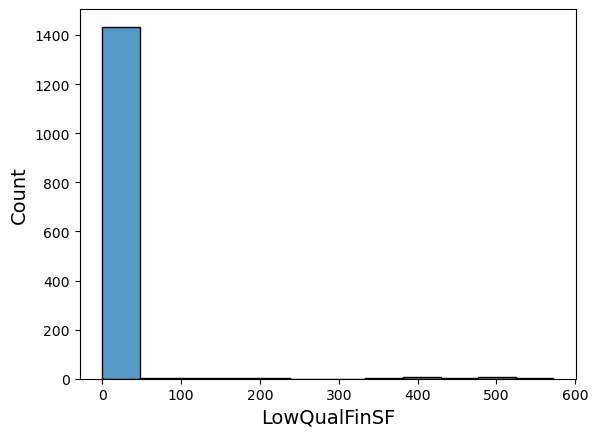

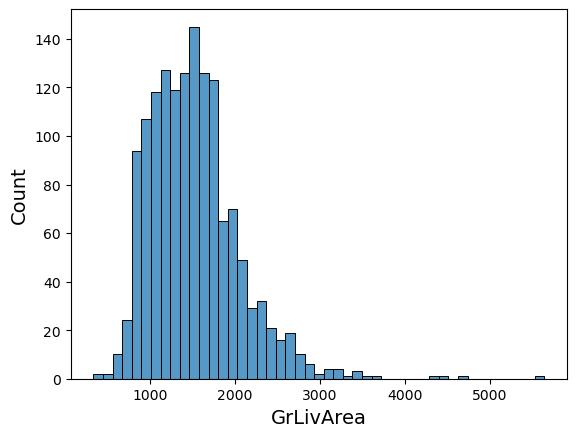

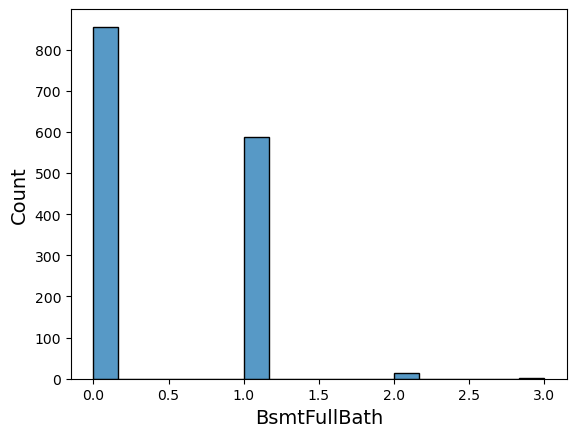

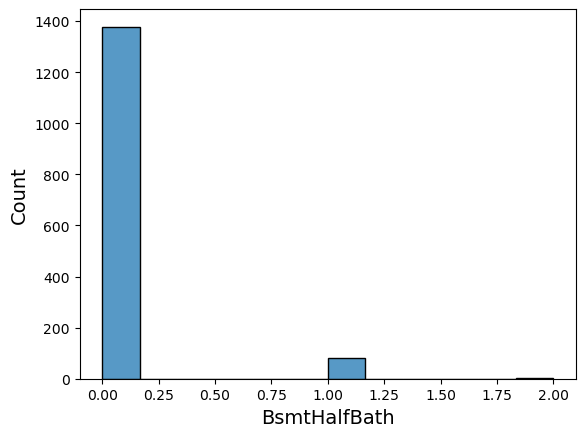

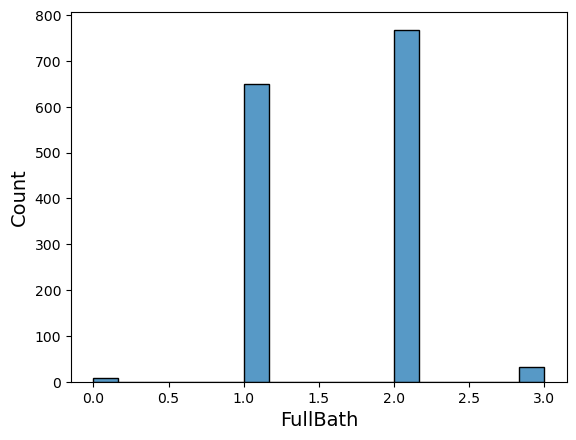

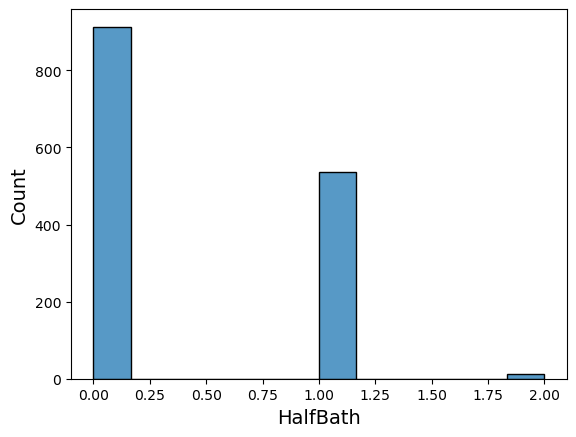

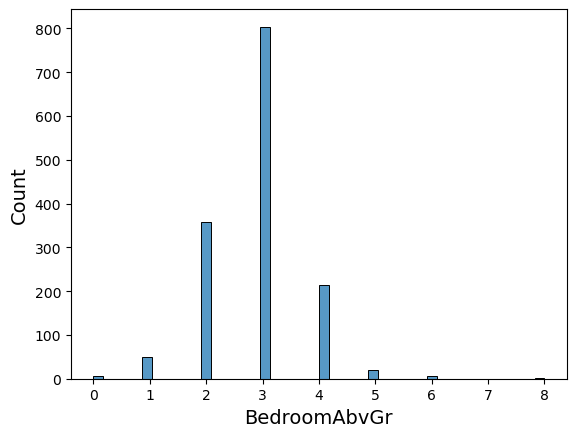

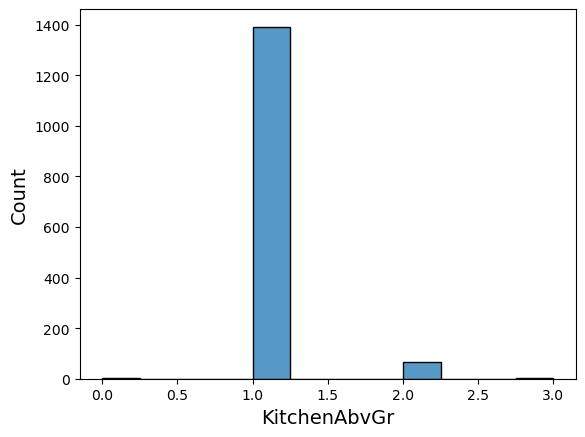

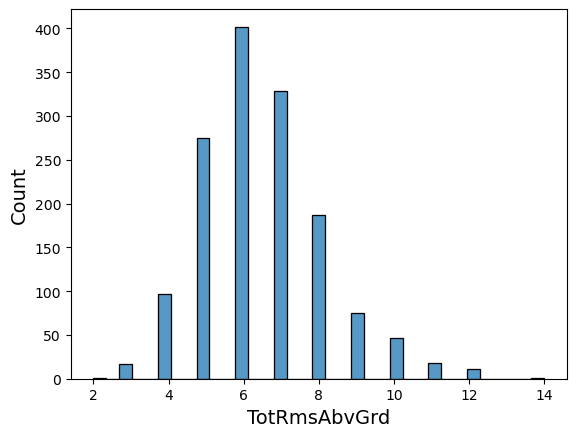

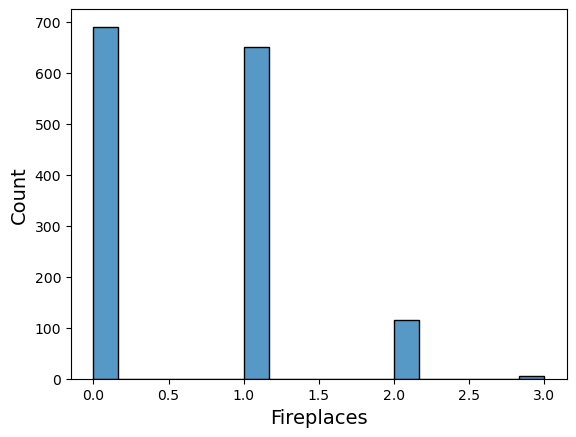

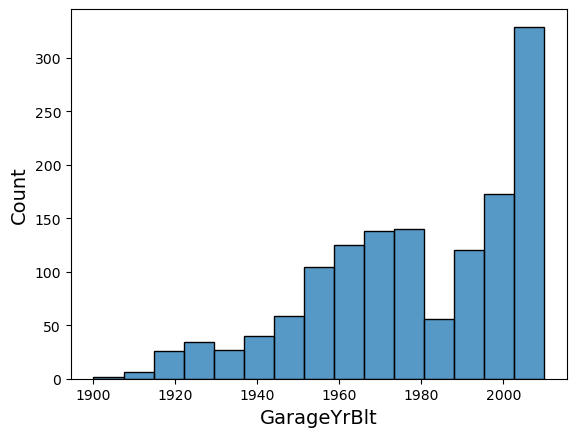

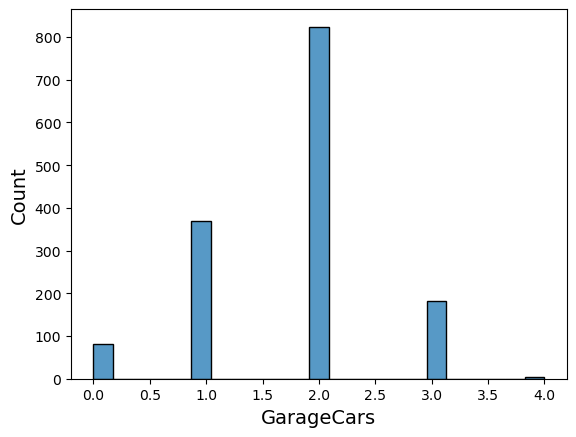

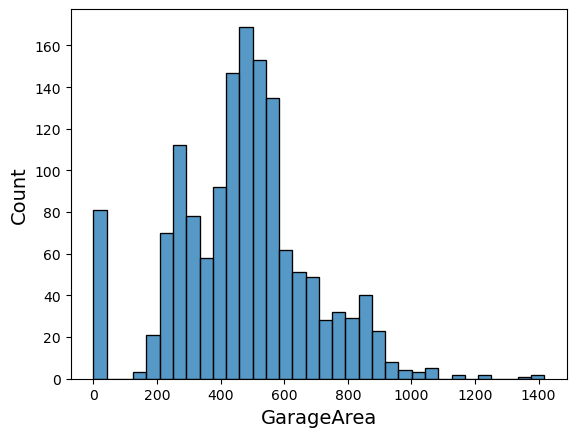

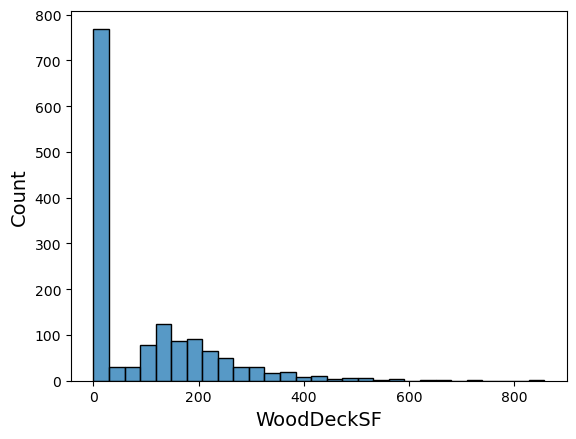

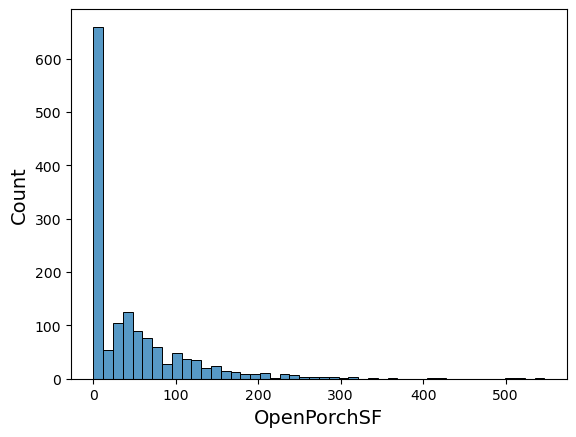

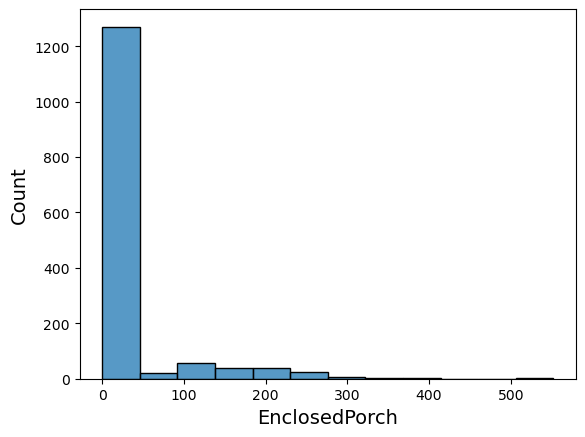

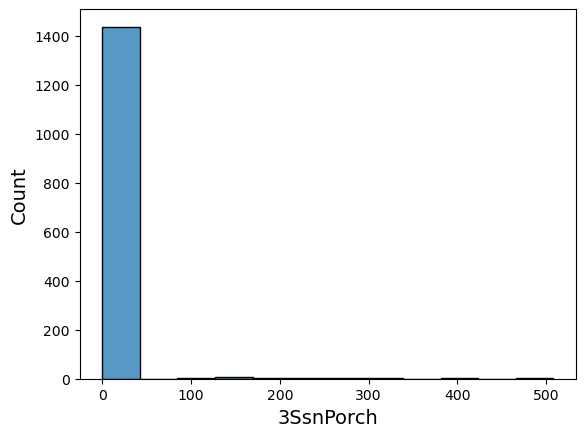

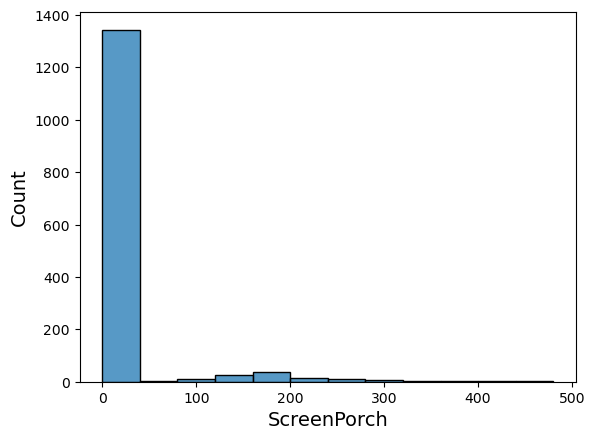

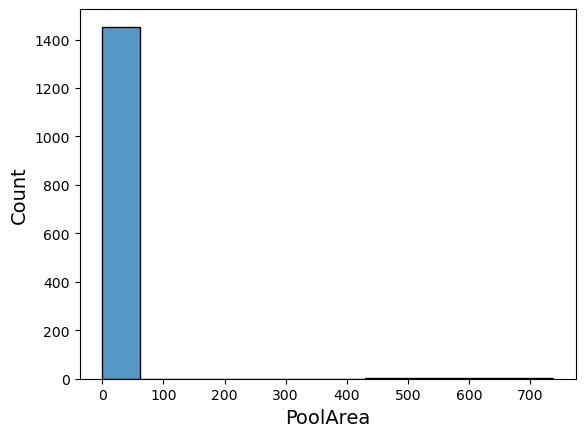

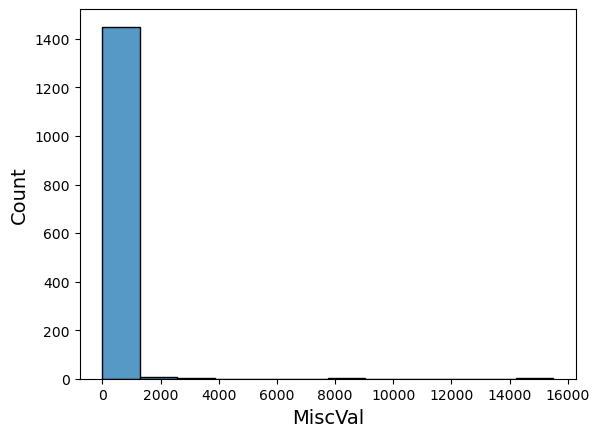

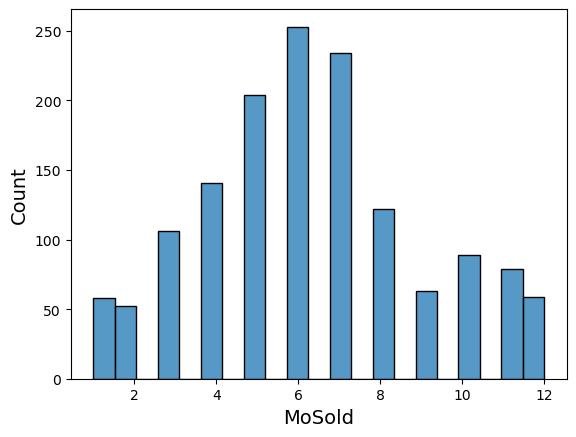

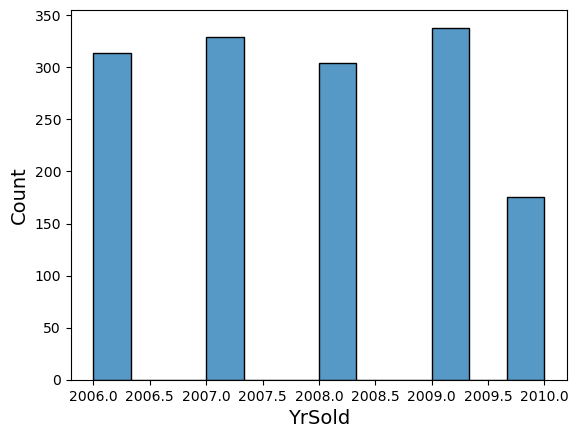

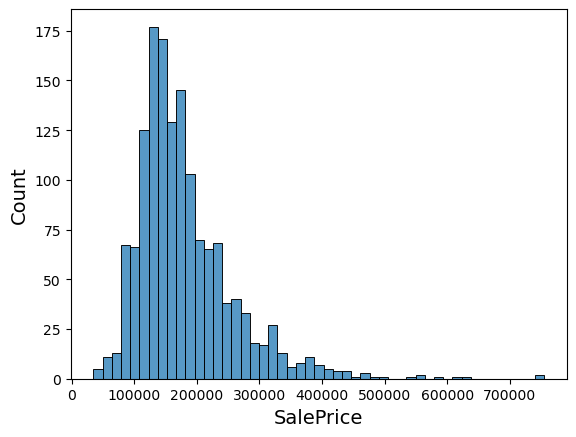

In [18]:

for i in housing_data.select_dtypes(include = "number").columns:
    sns.histplot(data= housing_data,x =i  )
    plt.show()


#### detecting outliers

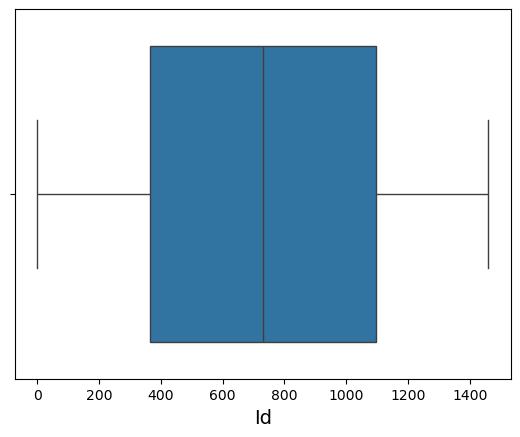

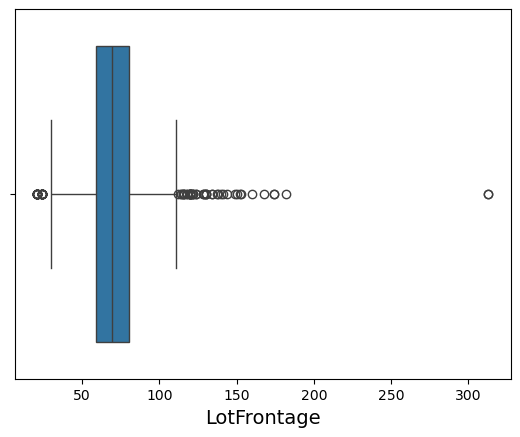

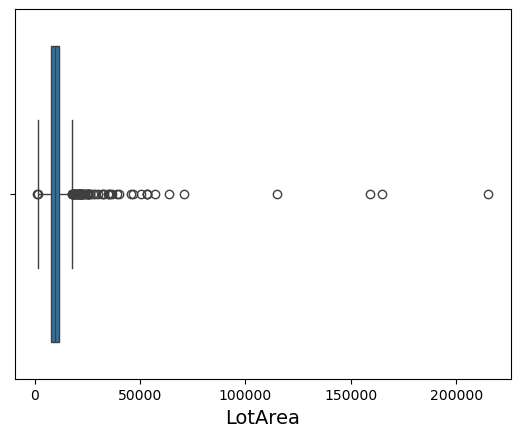

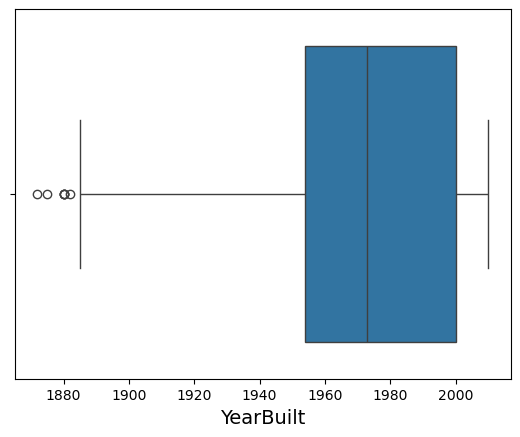

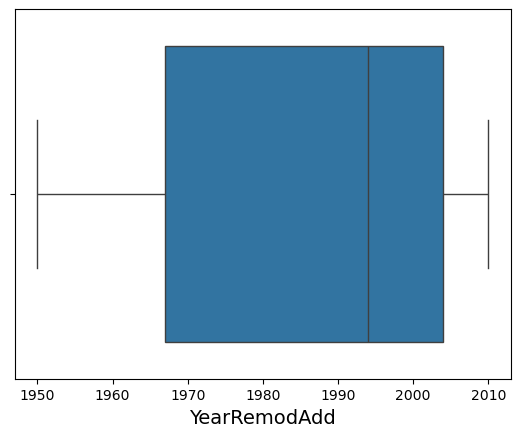

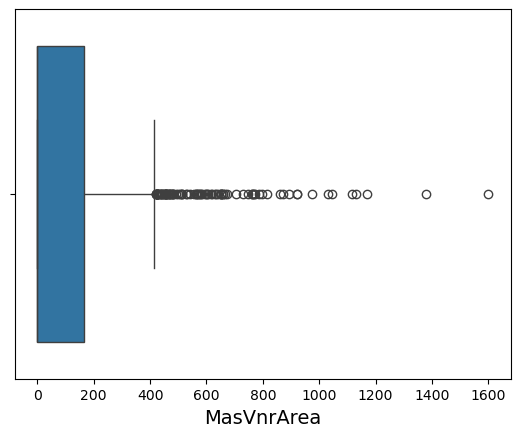

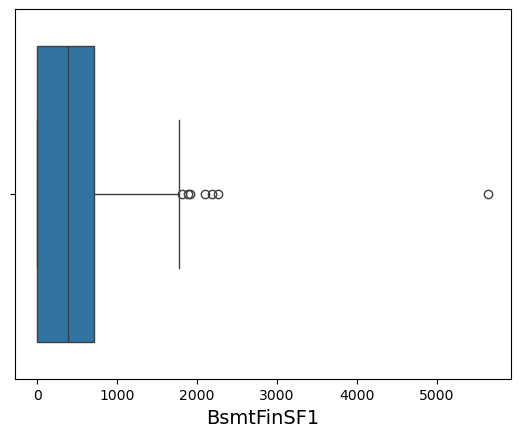

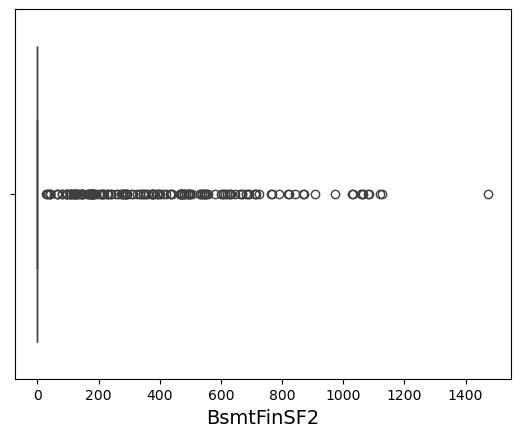

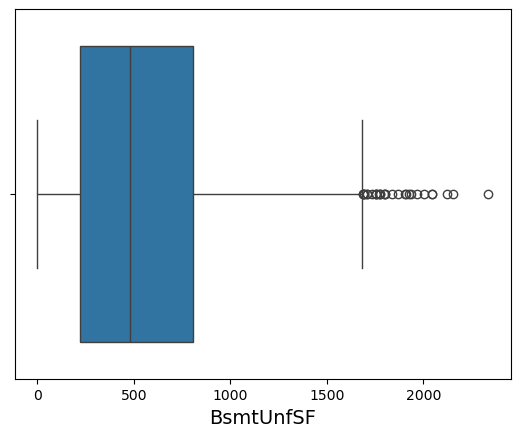

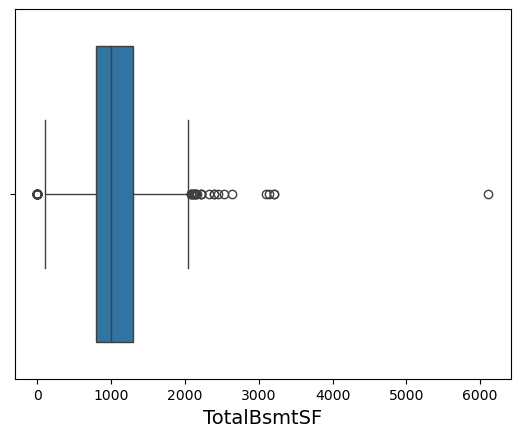

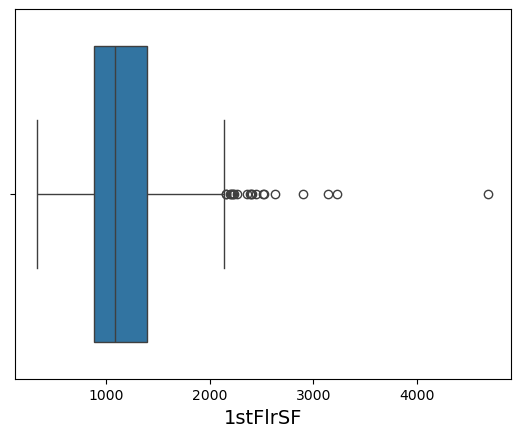

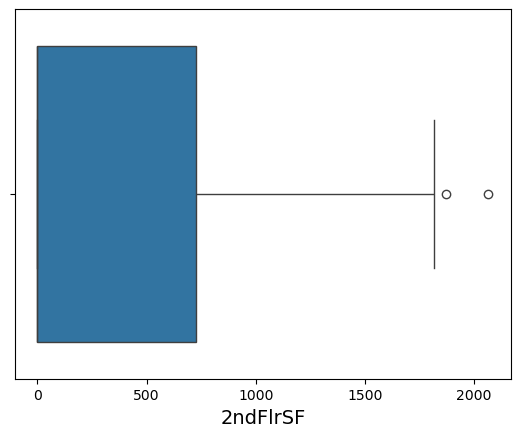

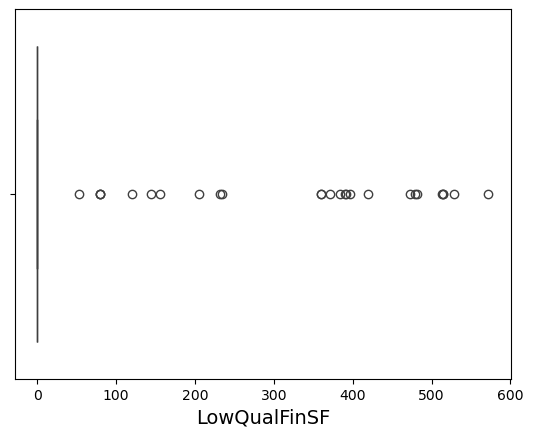

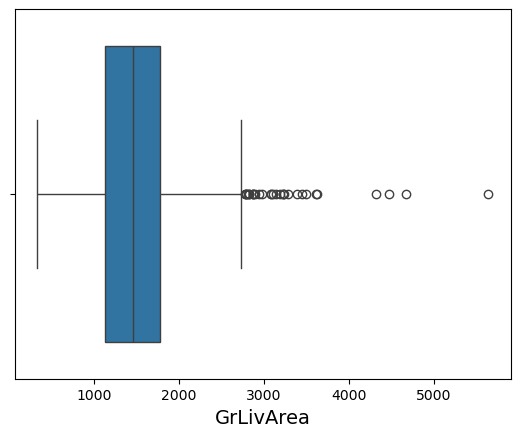

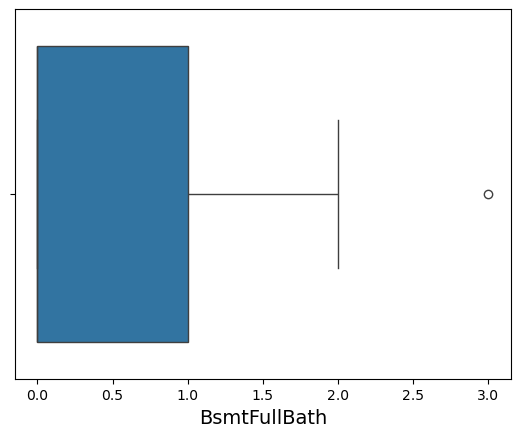

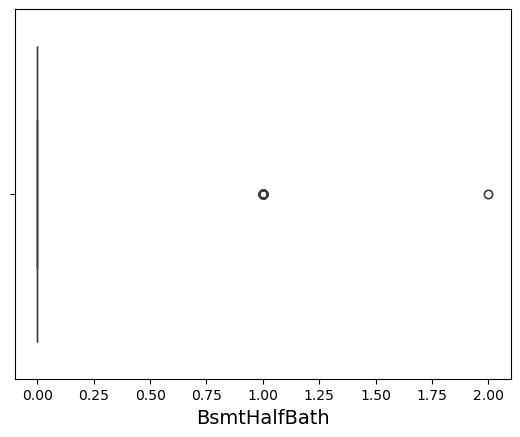

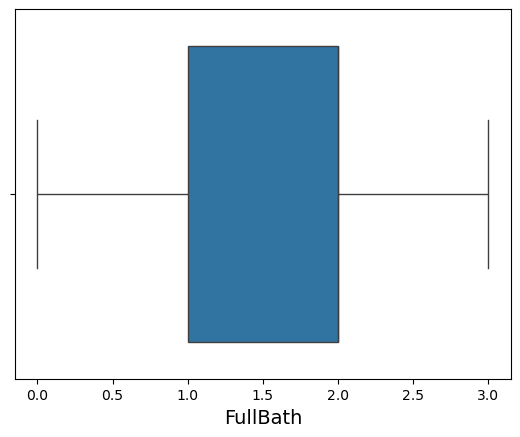

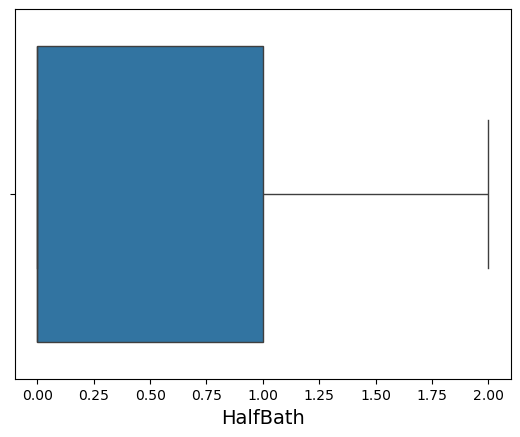

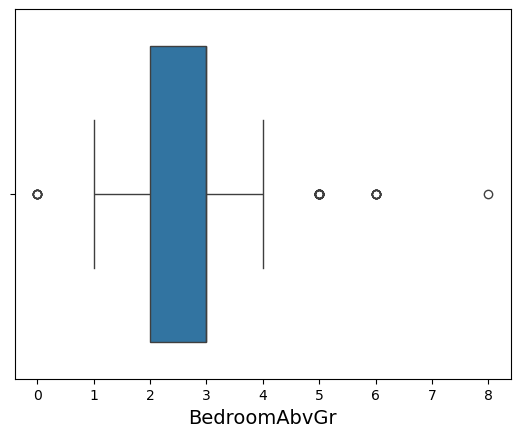

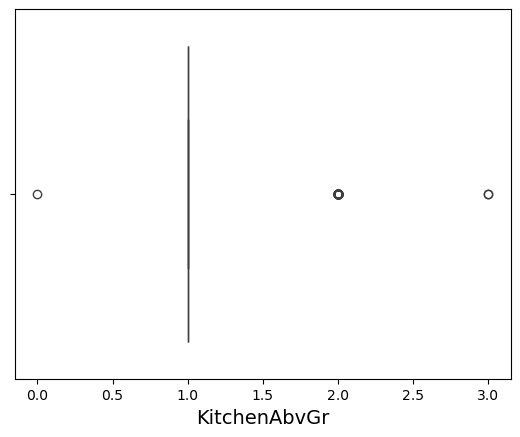

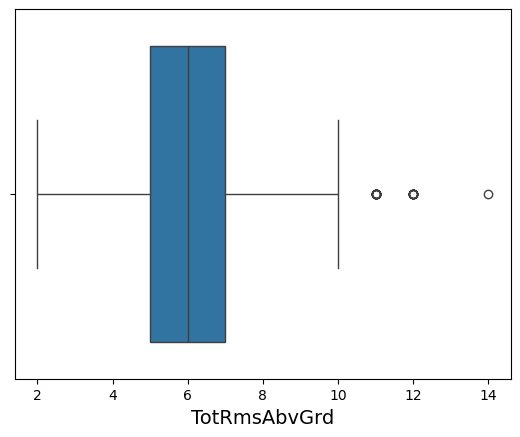

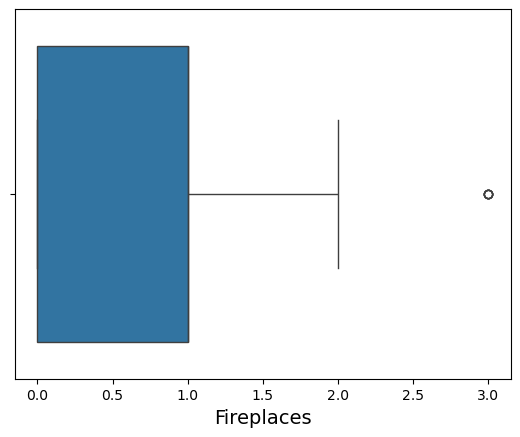

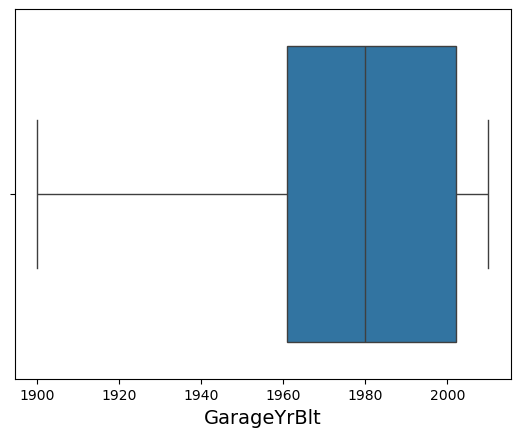

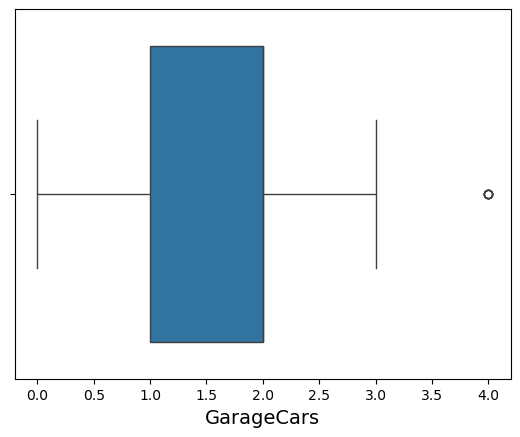

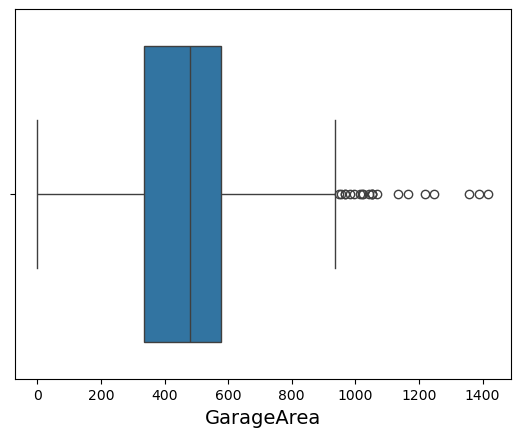

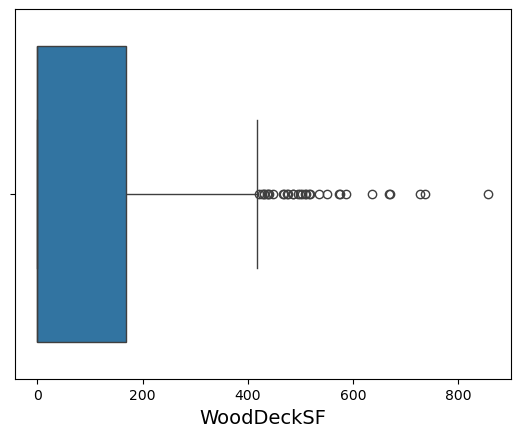

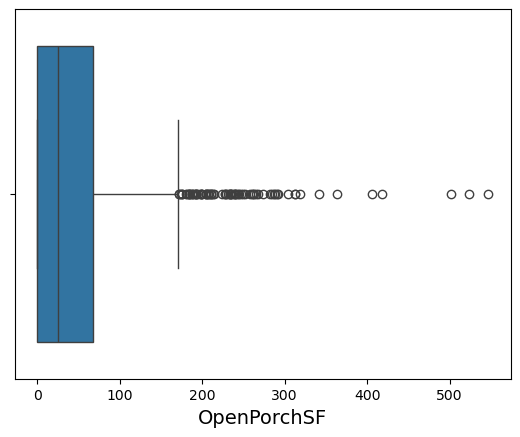

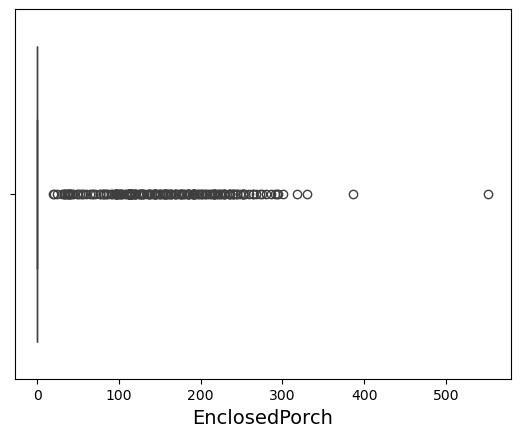

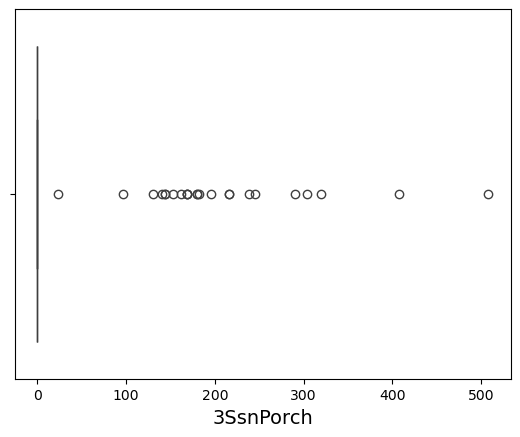

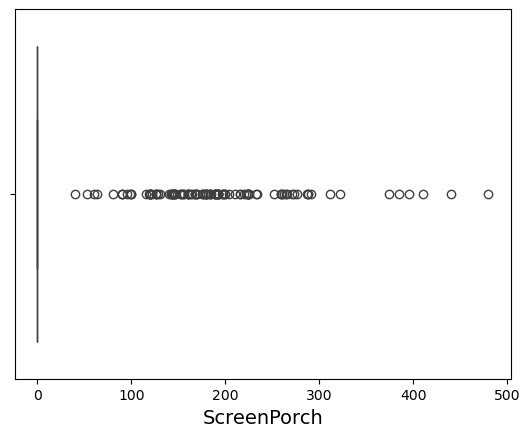

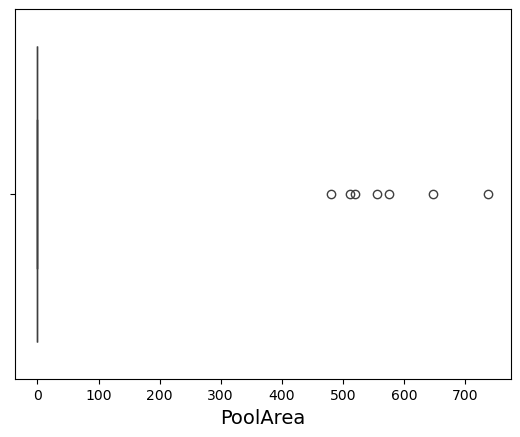

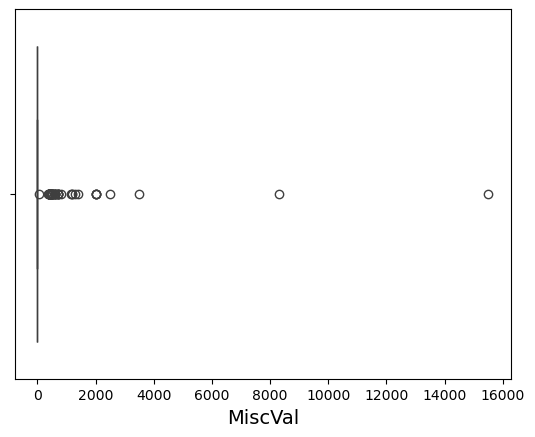

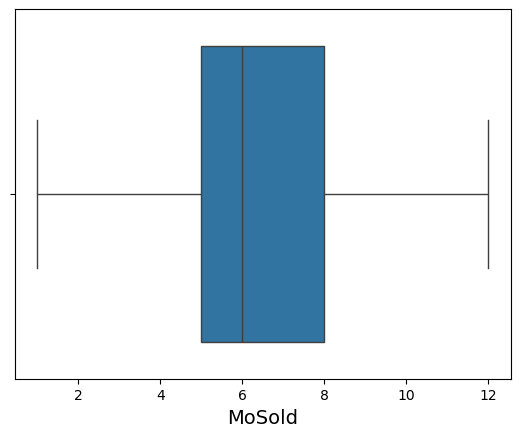

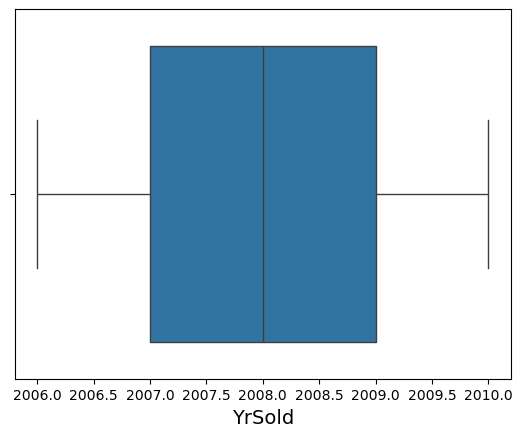

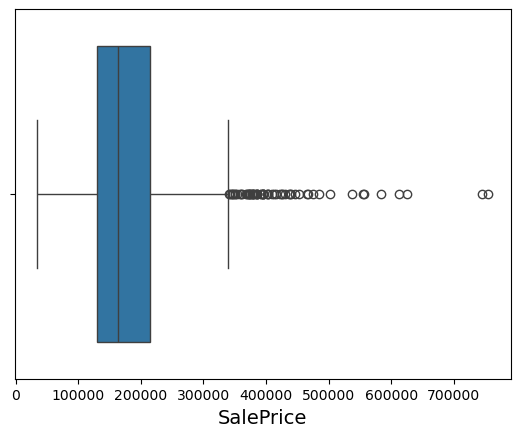

In [20]:

for i in housing_data.select_dtypes(include = ['int','float']).columns:
    sns.boxplot(data= housing_data, x =i  )
    plt.show()

#### scatter plot for the relationship

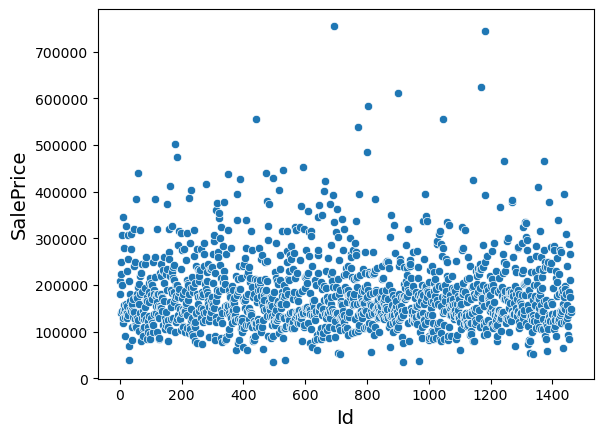

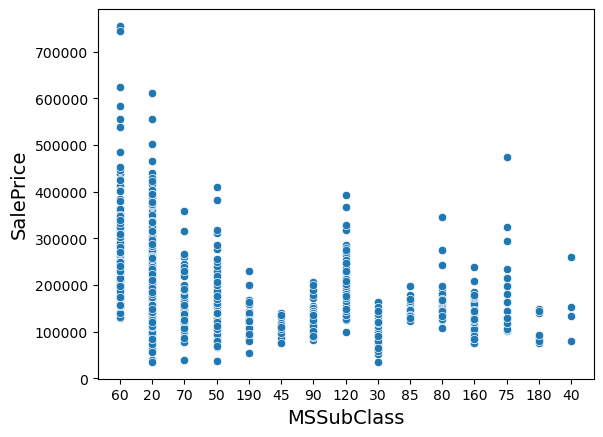

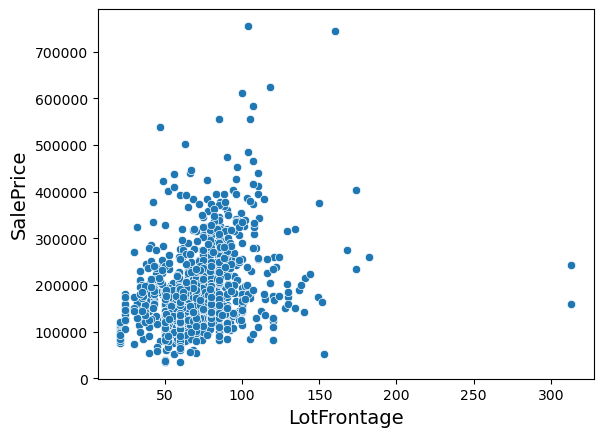

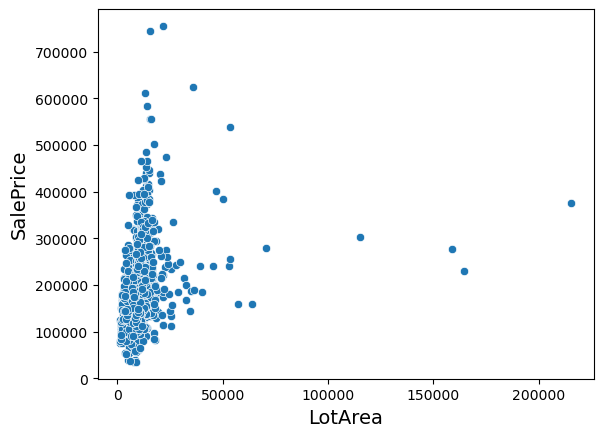

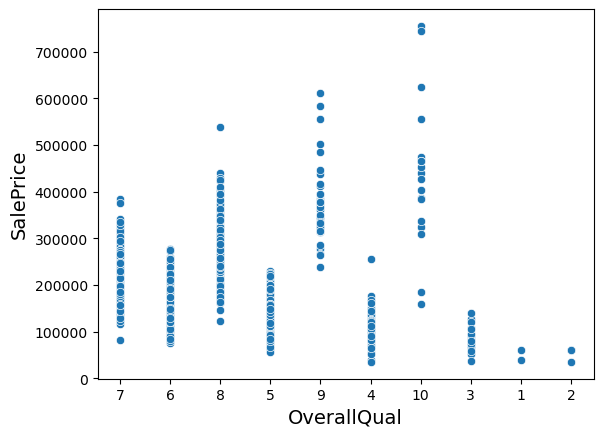

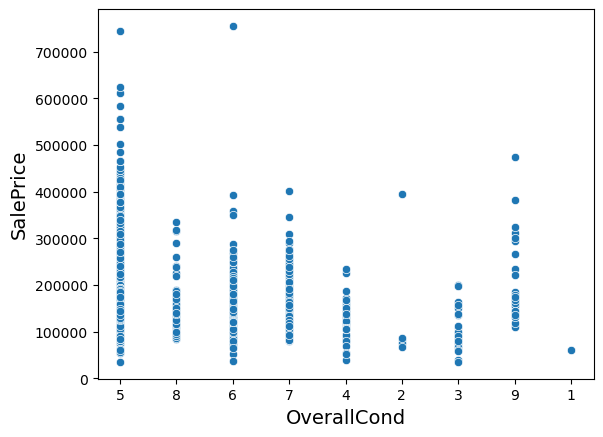

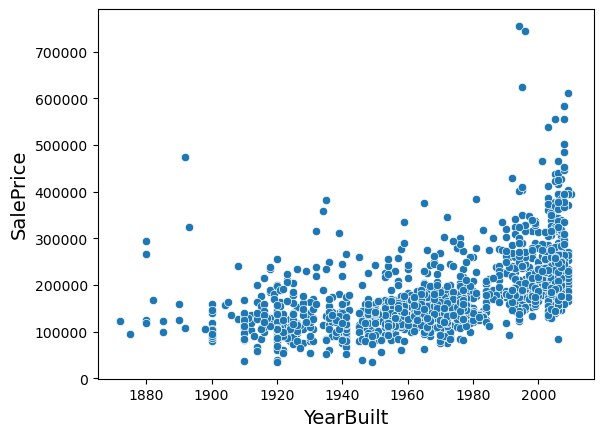

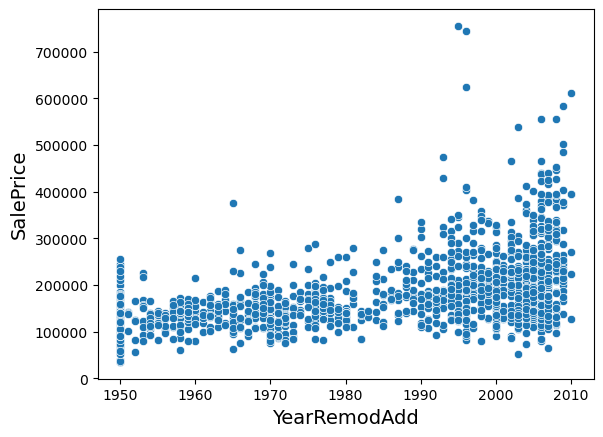

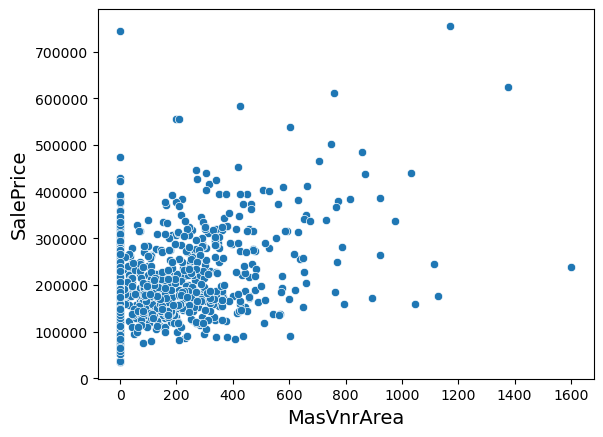

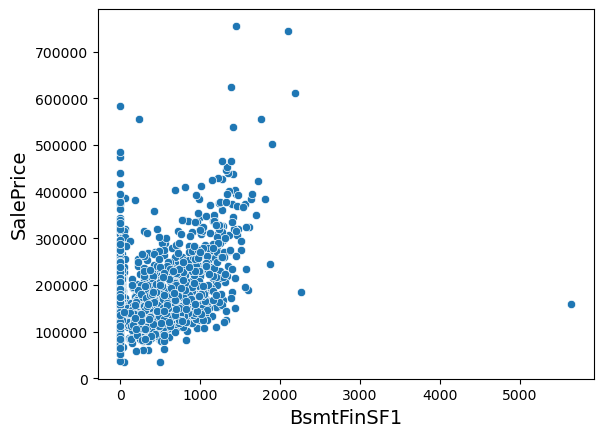

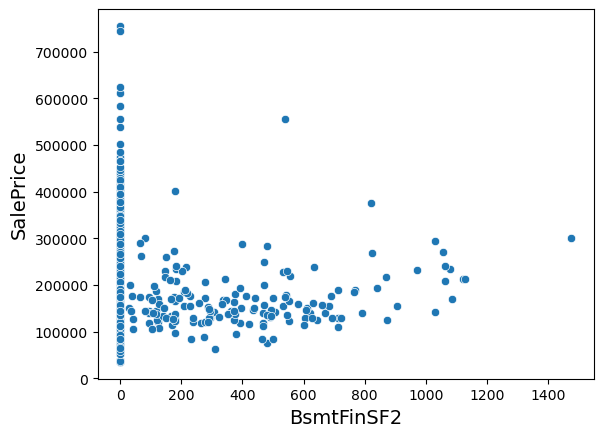

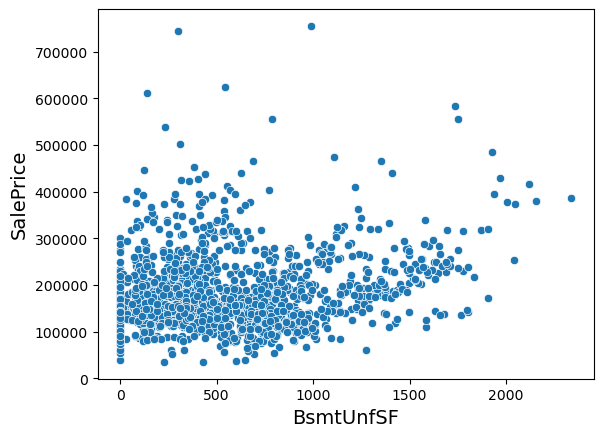

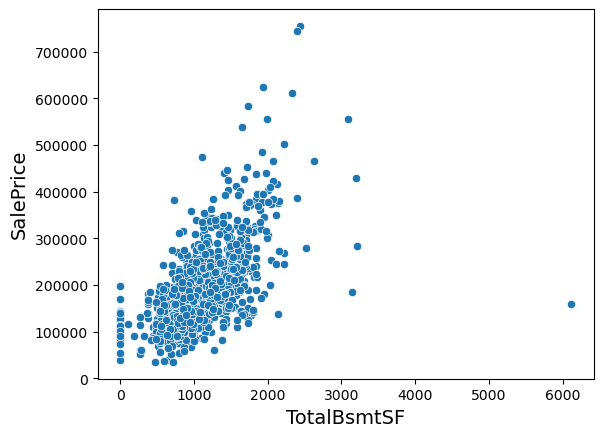

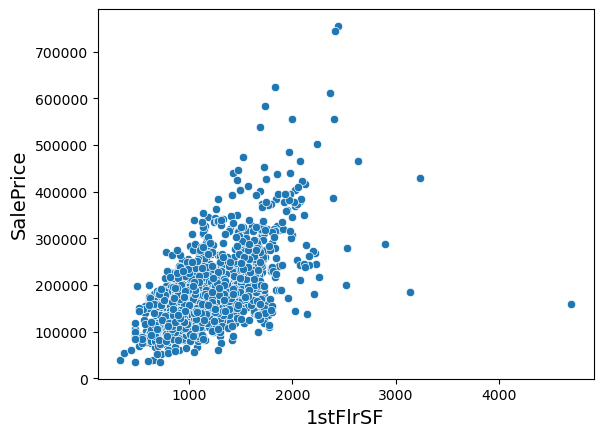

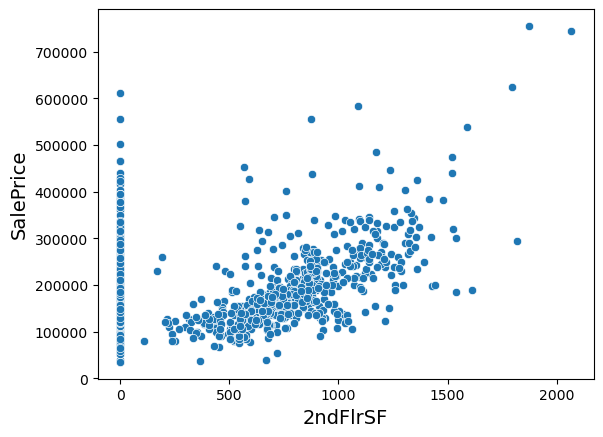

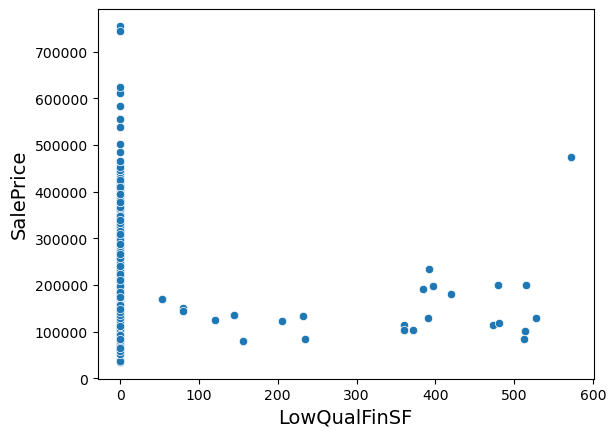

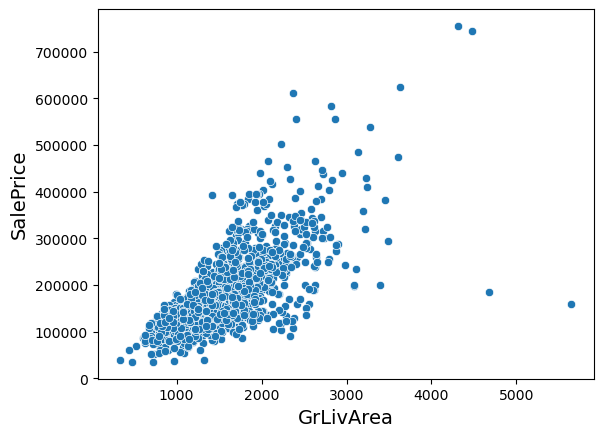

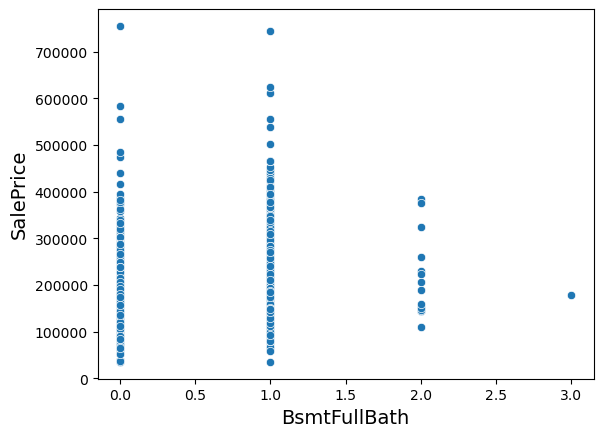

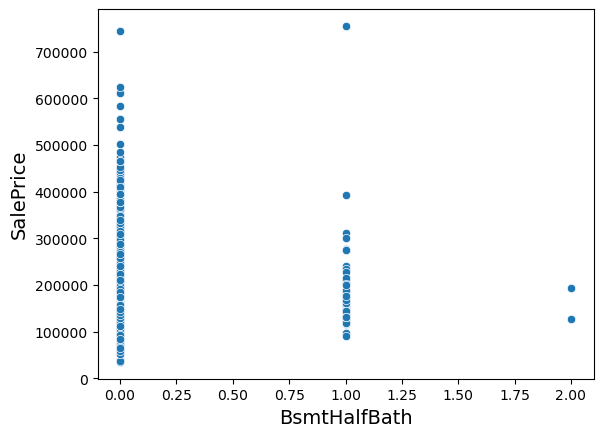

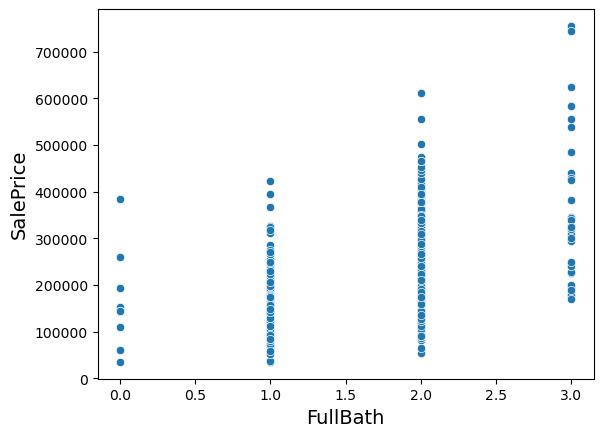

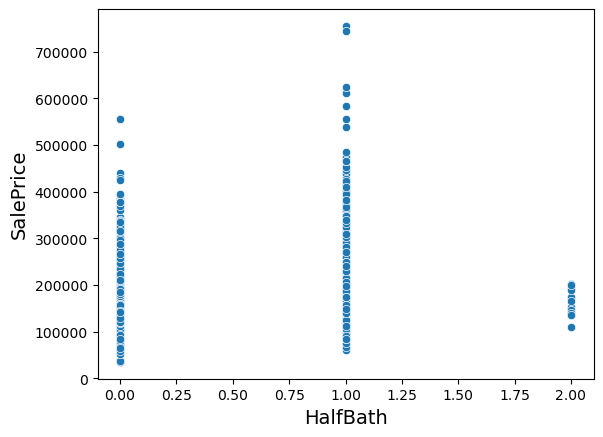

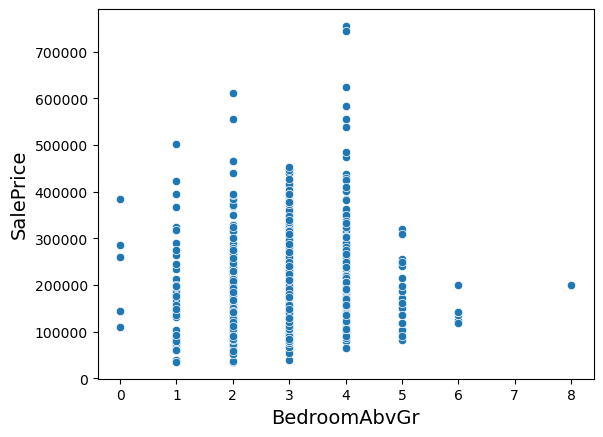

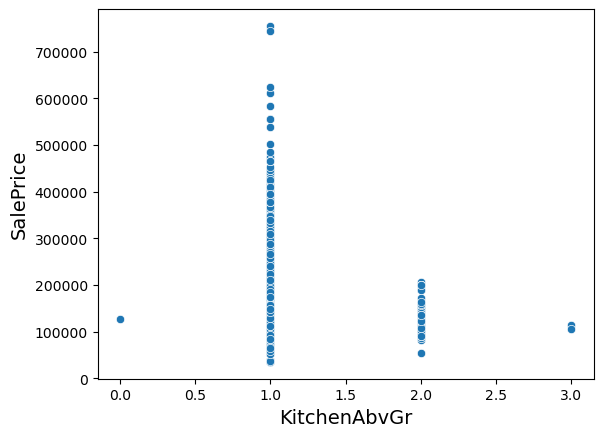

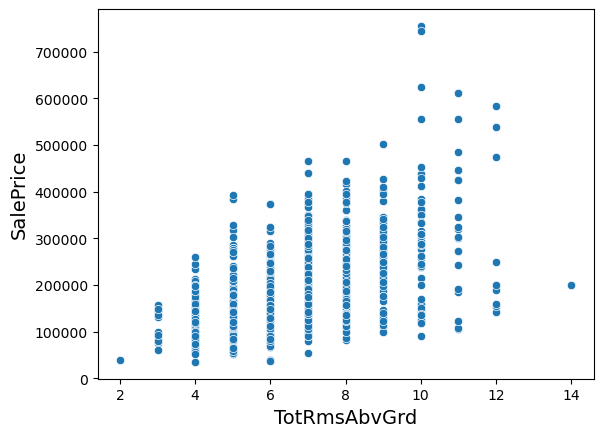

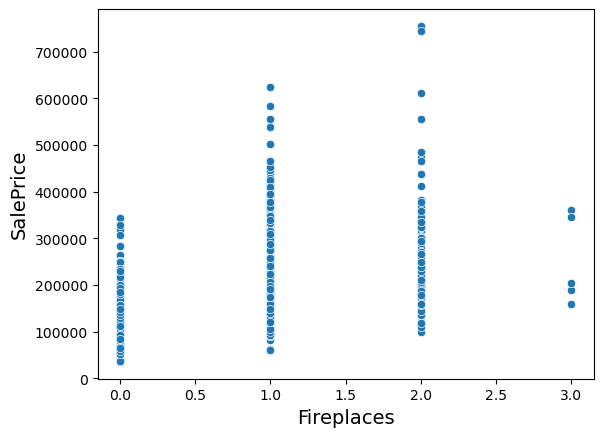

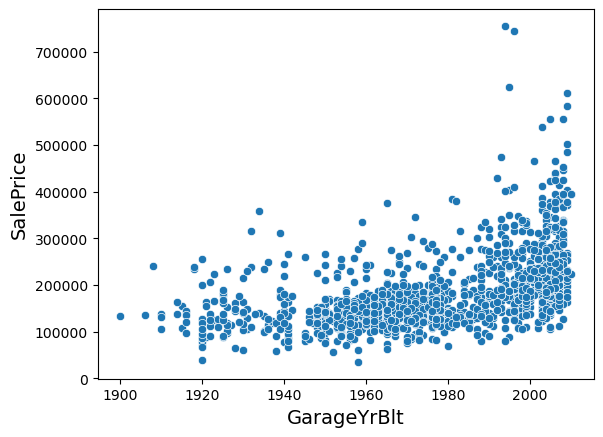

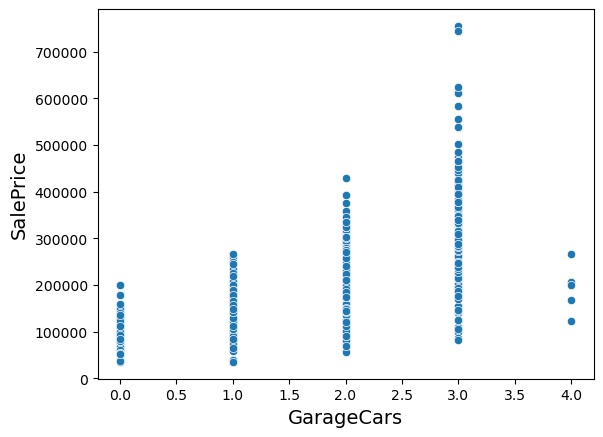

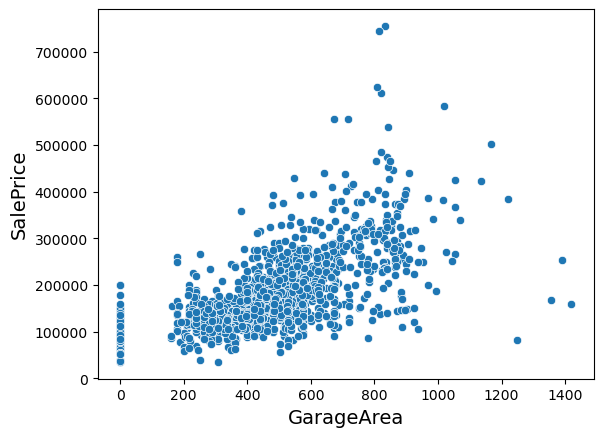

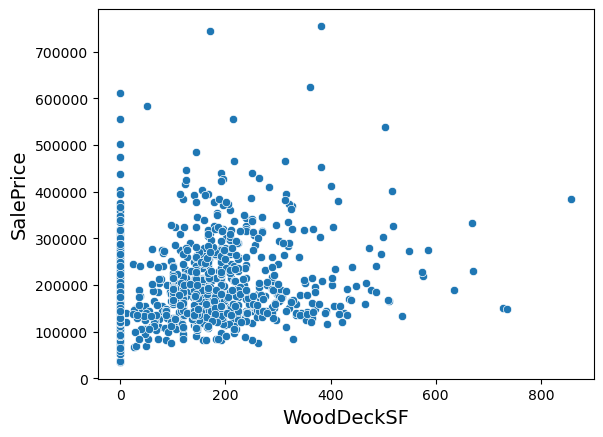

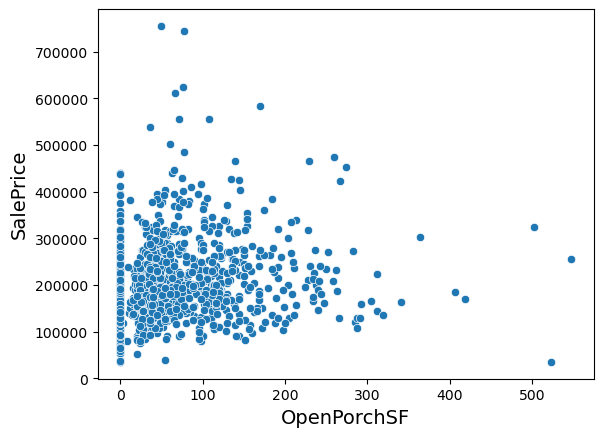

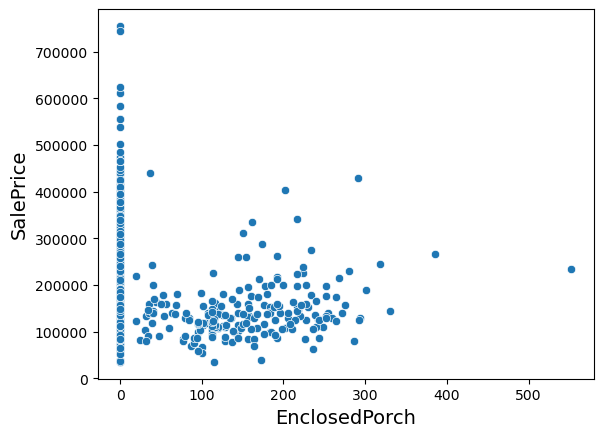

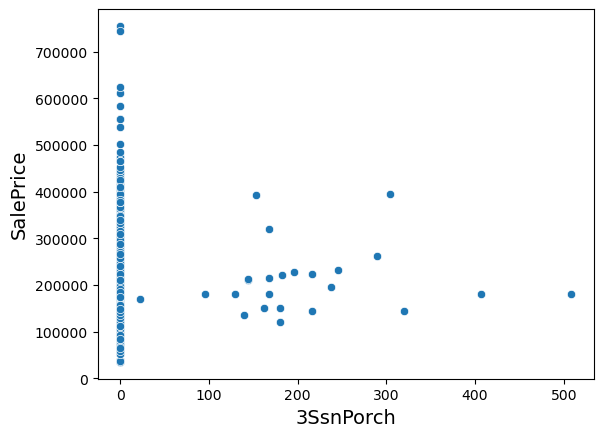

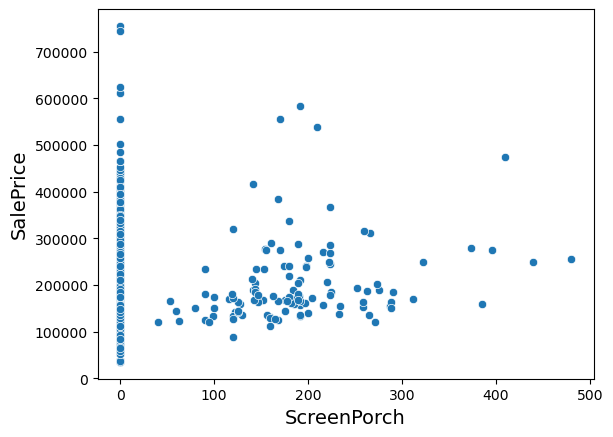

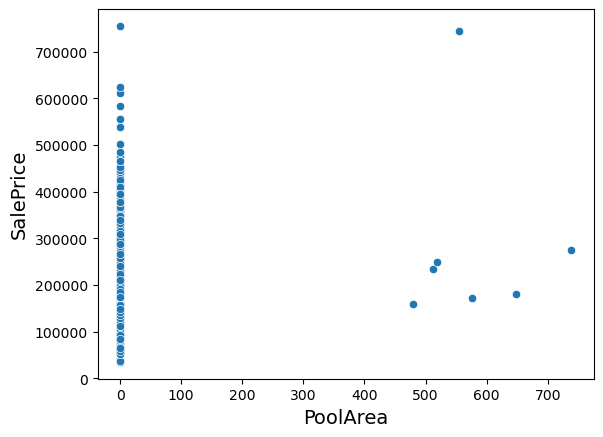

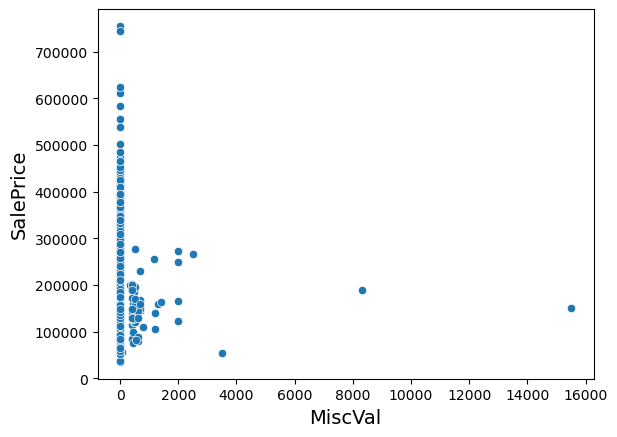

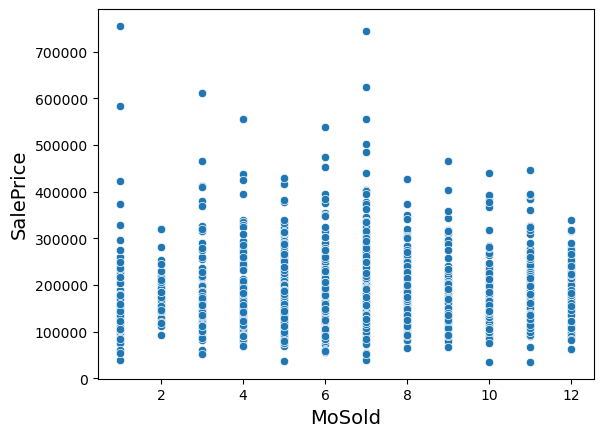

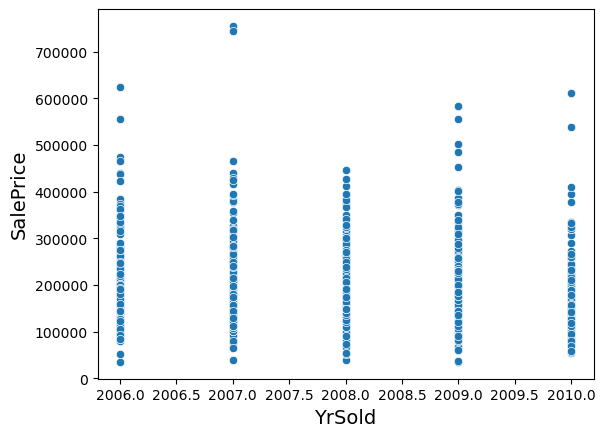

In [22]:
for i in['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold' ]:
    sns.scatterplot(data= housing_data,x =i, y = 'SalePrice'  )
    plt.show()

In [23]:
 housing_data.select_dtypes(include = "number").columns

Index(['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Looking for Correlations

In [25]:
corr_matrix = housing_data.corr(numeric_only= True)

In [26]:
corr_matrix['SalePrice'].sort_values(ascending= False)

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

<Axes: >

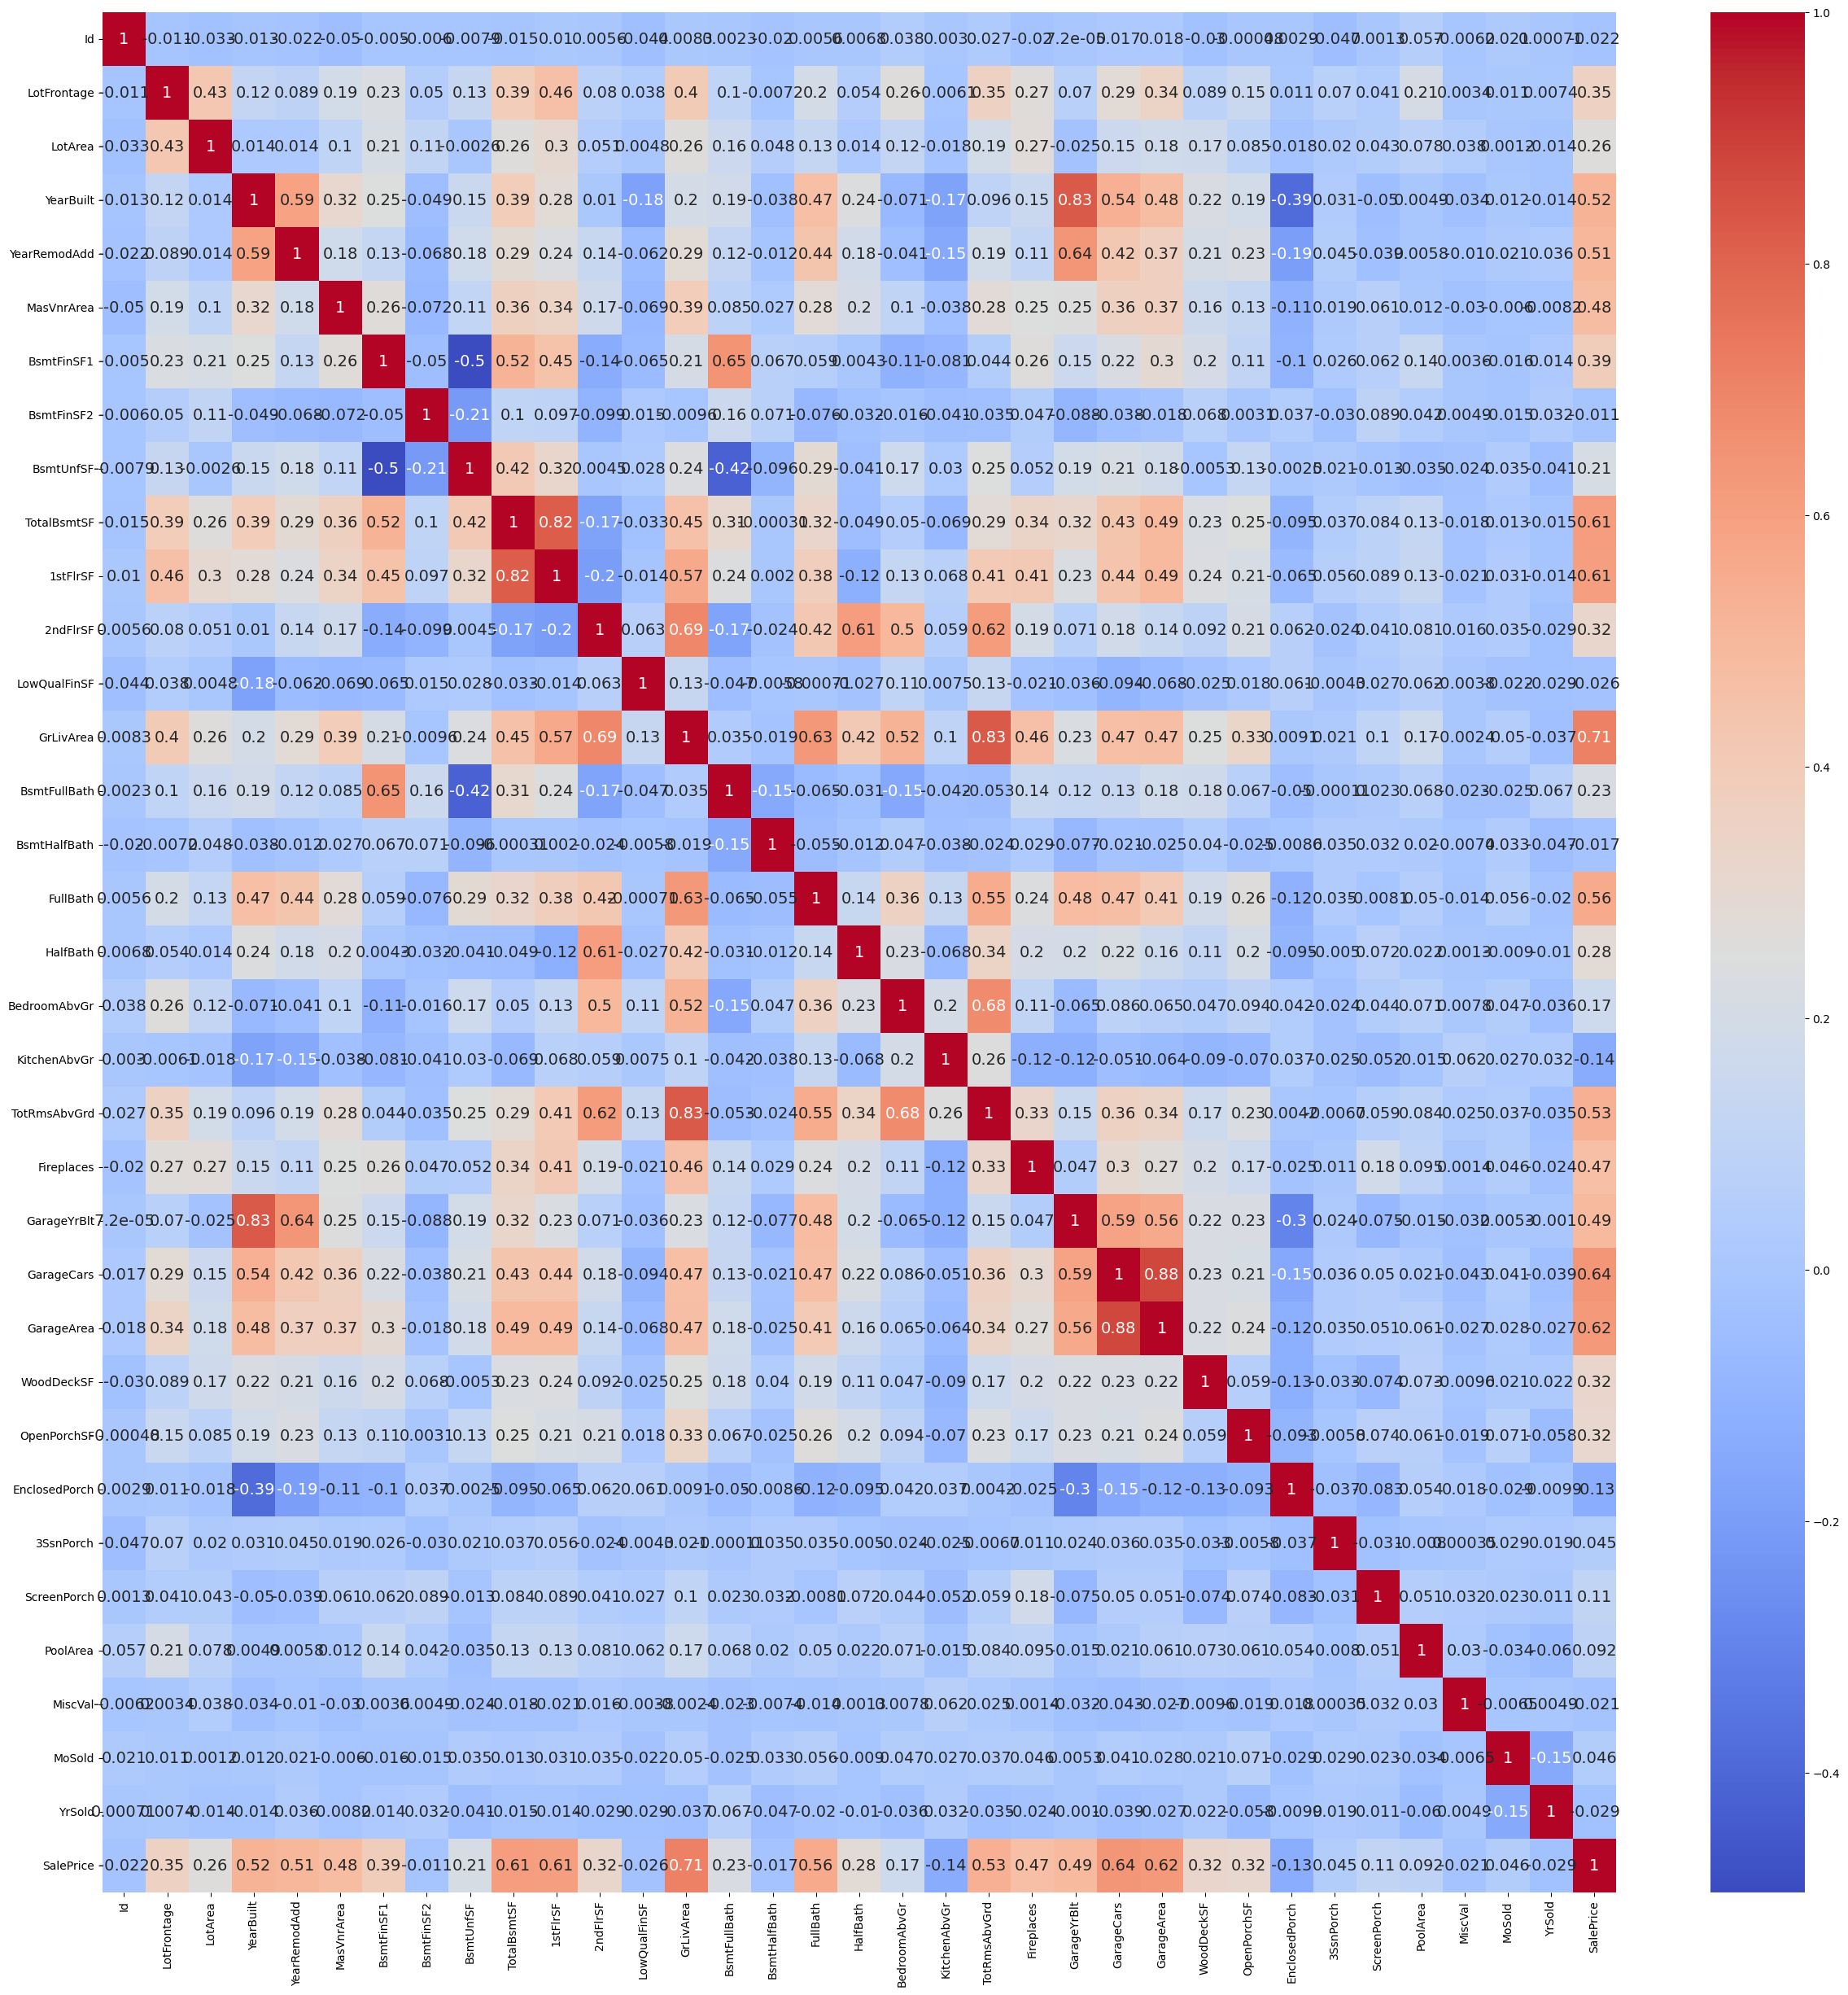

In [27]:
plt.figure(figsize= (30,30))
sns.heatmap(corr_matrix, annot= True,cmap = "coolwarm" )

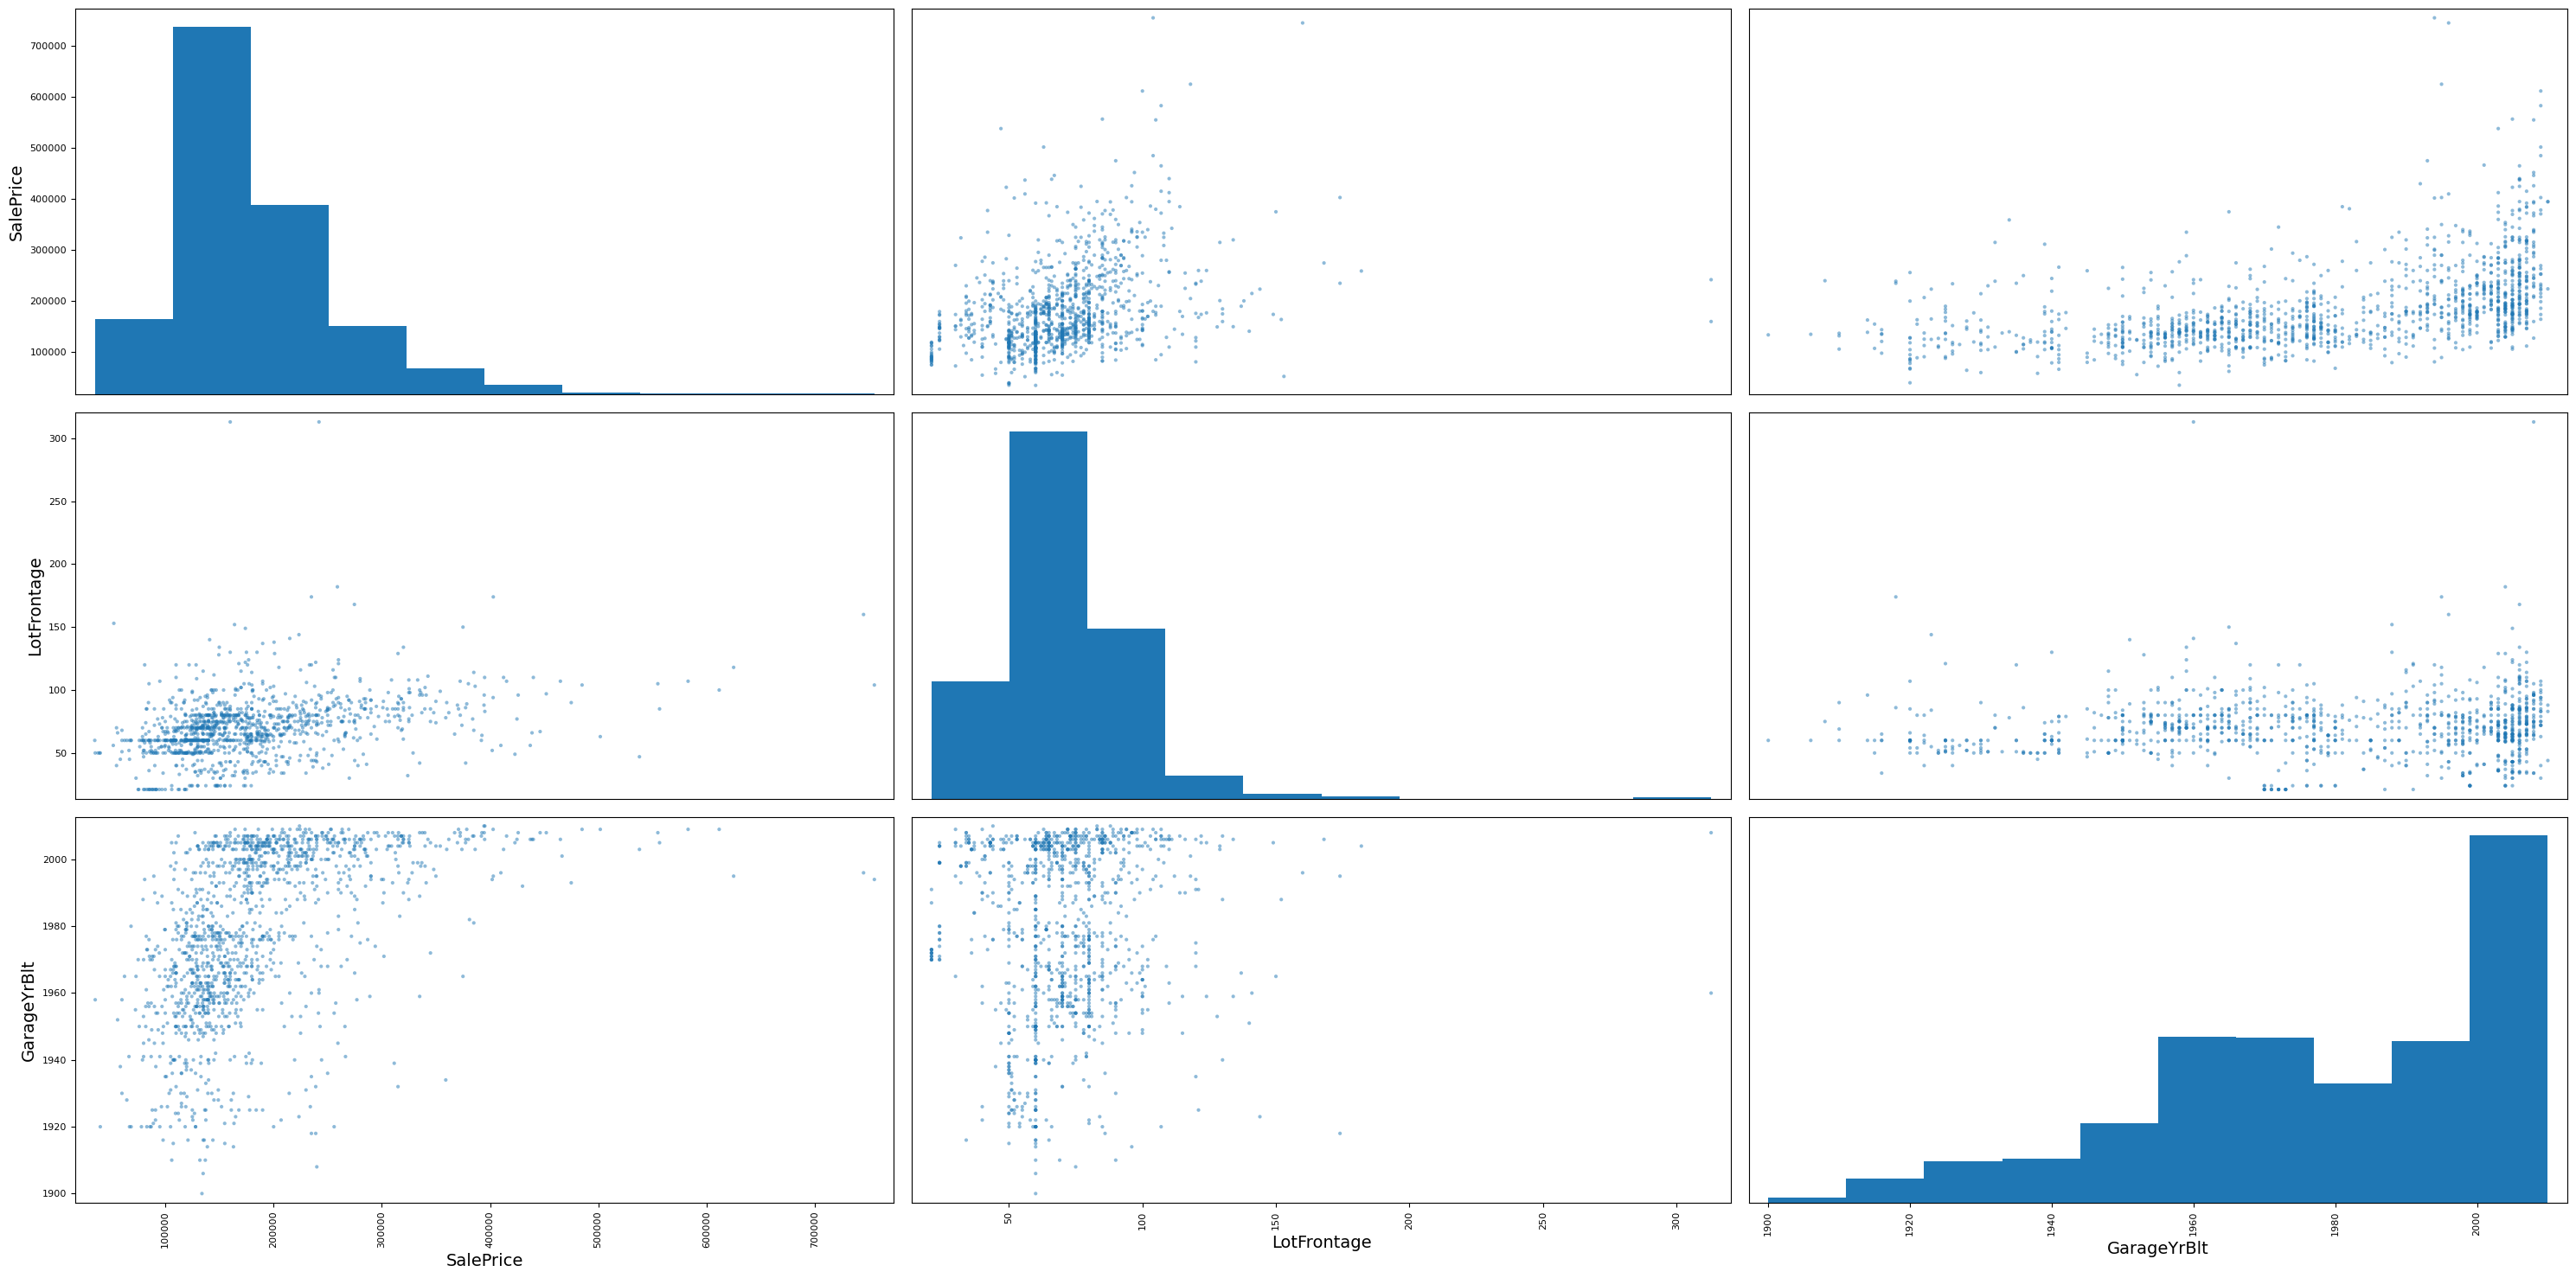

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "MSSubClass", "LotFrontage",
              "GarageYrBlt"]
scatter_matrix(housing_data[attributes], figsize=(30, 15))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

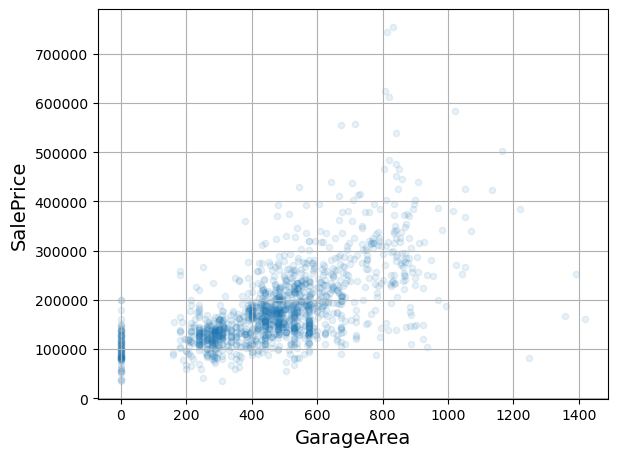

In [29]:
housing_data.plot(kind="scatter", x="GarageArea", y="SalePrice",
             alpha=0.1, grid=True)
save_fig("saleprice_vs_Over_all_Qual _scatterplot")  # extra code
plt.show()

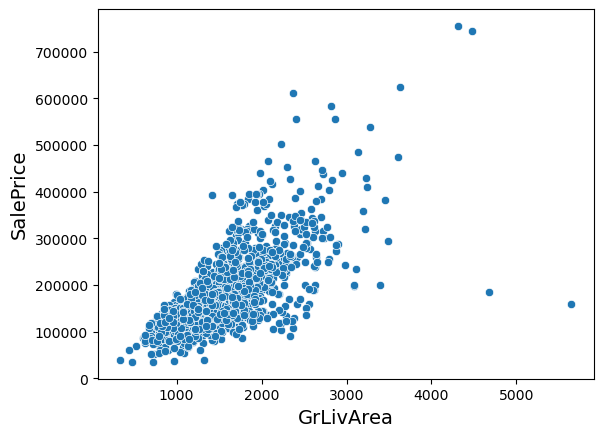

In [30]:
sns.scatterplot(x=housing_data["GrLivArea"], y=housing_data["SalePrice"])
plt.show()

# Prepare the Data for Machine Learning Algorithms

# Data Cleaning

In [33]:
null_rows_idx = housing_data.isnull().any(axis=1)
housing_data.loc[null_rows_idx].head()

Id MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1         60       RL         65.0     8450   Pave   NaN      Reg   
1   2         20       RL         80.0     9600   Pave   NaN      Reg   
2   3         60       RL         68.0    11250   Pave   NaN      IR1   
3   4         70       RL         60.0     9550   Pave   NaN      IR1   
4   5         60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle OverallQual OverallCond  YearBuilt  \
0       Norm     1Fam     2Story           7           5       2003   
1       Norm     1Fam     1Story           6           8       1976   
2       Norm     1Fam     2Story           7           5       2001   
3       Norm     1Fam     2Story           7           5       1915   
4       Norm     1Fam     2Story           8           5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ     

In [34]:
missing_info = housing_data.isnull().sum().sort_values().reset_index()
missing_info.rename(columns={'index':'col_name', 0:'col_count'}, inplace =True) 
missing_info['pct_count']= missing_info['col_count'] /housing_data.shape[0] *100
missing_info

col_name  col_count  pct_count
0              Id          0   0.000000
1     TotalBsmtSF          0   0.000000
2         Heating          0   0.000000
3   SaleCondition          0   0.000000
4      CentralAir          0   0.000000
5        1stFlrSF          0   0.000000
6        2ndFlrSF          0   0.000000
7    LowQualFinSF          0   0.000000
8       GrLivArea          0   0.000000
9    BsmtFullBath          0   0.000000
10   BsmtHalfBath          0   0.000000
11       FullBath          0   0.000000
12       HalfBath          0   0.000000
13   BedroomAbvGr          0   0.000000
14   KitchenAbvGr          0   0.000000
15    KitchenQual          0   0.000000
16   TotRmsAbvGrd          0   0.000000
17     Functional          0   0.000000
18       SaleType          0   0.000000
19         YrSold          0   0.000000
20         MoSold          0   0.000000
21        MiscVal          0   0.000000
22       PoolArea          0   0.000000
23    ScreenPorch          0   0.000000
24      BsmtUnfSF          0   0.000000
25      3SsnPorch          0   0.000000
26    OpenPorchSF          0   0.000000
27     WoodDeckSF          0   0.000000
28     PavedDrive          0   0.000000
29     GarageArea          0   0.000000
30     GarageCars          0   0.000000
31     Fireplaces          0   0.000000
32  EnclosedPorch          0   0.000000
33     BsmtFinSF2          0   0.000000
34      HeatingQC          0   0.000000
35      SalePrice          0   0.000000
36      Utilities          0   0.000000
37    LandContour          0   0.000000
38   Neighborhood          0   0.000000
39     Condition1          0   0.000000
40       LotShape          0   0.000000
41         Street          0   0.000000
42        LotArea          0   0.000000
43     BsmtFinSF1          0   0.000000
44     Condition2          0   0.000000
45       BldgType          0   0.000000
46     HouseStyle          0   0.000000
47    OverallQual          0   0.000000
48    OverallCond          0   0.000000
49      YearBuilt          0   0.000000
50   YearRemodAdd          0   0.000000
51      RoofStyle          0   0.000000
52       RoofMatl          0   0.000000
53    Exterior1st          0   0.000000
54    Exterior2nd          0   0.000000
55       MSZoning          0   0.000000
56      ExterQual          0   0.000000
57      ExterCond          0   0.000000
58     Foundation          0   0.000000
59     MSSubClass          0   0.000000
60      LandSlope          0   0.000000
61      LotConfig          0   0.000000
62     Electrical          1   0.068493
63     MasVnrArea          8   0.547945
64       BsmtQual         37   2.534247
65       BsmtCond         37   2.534247
66   BsmtFinType1         37   2.534247
67   BsmtFinType2         38   2.602740
68   BsmtExposure         38   2.602740
69     GarageQual         81   5.547945
70   GarageFinish         81   5.547945
71    GarageYrBlt         81   5.547945
72     GarageType         81   5.547945
73     GarageCond         81   5.547945
74    LotFrontage        259  17.739726
75    FireplaceQu        690  47.260274
76     MasVnrType        872  59.726027
77          Fence       1179  80.753425
78          Alley       1369  93.767123
79    MiscFeature       1406  96.301370
80         PoolQC       1453  99.520548

In [35]:

# drop theses columns due to large null values or many same values
housing_data  = housing_data.drop(['Utilities','PoolQC','MiscFeature','Alley','Id'], axis=1)

 # Only one null value so fill as the most frequent value(mode)
housing_data['Electrical'] = housing_data['Electrical'].fillna(housing_data['Electrical'].mode()[0])

#Null value likely means no masonry veneer
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].fillna(0) # Area is 0
housing_data['MasVnrType'] = housing_data['MasVnrType'].fillna('NA') #fill as no masonry vaneer

#null means NA and NA means no basement
housing_data['BsmtQual'] = housing_data['BsmtQual'].fillna('NA')
housing_data['BsmtCond'] = housing_data['BsmtCond'].fillna('NA')
housing_data['BsmtExposure'] = housing_data['BsmtExposure'].fillna('NA')
housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].fillna('NA')
housing_data['BsmtFinType2'] = housing_data['BsmtFinType2'].fillna('NA')

#null means NA and NA means no Garage
housing_data['GarageCond'] = housing_data['GarageCond'].fillna('NA')
housing_data['GarageQual'] = housing_data['GarageQual'].fillna('NA')
housing_data['GarageFinish'] = housing_data['GarageFinish'].fillna('NA')
housing_data['GarageType'] = housing_data['GarageType'].fillna('NA')
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna(0)

housing_data['LotFrontage'] = housing_data['LotFrontage'].fillna(round(housing_data['LotFrontage'].mean()))


In [36]:
X =housing_data [housing_data.select_dtypes(include=[np.number]).columns.tolist()].head()

In [37]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [38]:
housing = X.iloc[outlier_pred == 1]
#housing_labels = housing_labels.iloc[outlier_pred == 1]

In [39]:
housing

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  MiscVal  MoSold  YrSold  SalePrice  
0         0        0       2    2008     208500  
2         0        0       9    2008     223500  
3         0        0       2    2006     140000  
4         0        0      12    2008     250000

## Outlier treatment

# Handling Text and Categorical Attributes

#

In [43]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
housing_cat_1hot = cat_encoder.fit_transform(housing_data.select_dtypes(include=['object']))

In [44]:
housing_cat_1hot.head()

MSSubClass_120  MSSubClass_160  MSSubClass_180  MSSubClass_190  \
0             0.0             0.0             0.0             0.0   
1             0.0             0.0             0.0             0.0   
2             0.0             0.0             0.0             0.0   
3             0.0             0.0             0.0             0.0   
4             0.0             0.0             0.0             0.0   

   MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0            0.0            0.0            0.0            0.0            0.0   
1            1.0            0.0            0.0            0.0            0.0   
2            0.0            0.0            0.0            0.0            0.0   
3            0.0            0.0            0.0            0.0            0.0   
4            0.0            0.0            0.0            0.0            0.0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0            1.0            0.0            0.0            0.0            0.0   
1            0.0            0.0            0.0            0.0            0.0   
2            1.0            0.0            0.0            0.0            0.0   
3            0.0            1.0            0.0            0.0            0.0   
4            1.0            0.0            0.0            0.0            0.0   

   MSSubClass_90  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  \
0            0.0               0.0          0.0          0.0          1.0   
1            0.0               0.0          0.0          0.0          1.0   
2            0.0               0.0          0.0          0.0          1.0   
3            0.0               0.0          0.0          0.0          1.0   
4            0.0               0.0          0.0          0.0          1.0   

   MSZoning_RM  Street_Grvl  Street_Pave  LotShape_IR1  LotShape_IR2  \
0          0.0          0.0          1.0           0.0           0.0   
1          0.0          0.0          1.0           0.0           0.0   
2          0.0          0.0          1.0           1.0           0.0   
3          0.0          0.0          1.0           1.0           0.0   
4          0.0          0.0          1.0           1.0           0.0   

   LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0           0.0           1.0              0.0              0.0   
1           0.0           1.0              0.0              0.0   
2           0.0           0.0              0.0              0.0   
3           0.0           0.0              0.0              0.0   
4           0.0           0.0              0.0              0.0   

   LandContour_Low  LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  \
0              0.0              1.0               0.0                0.0   
1              0.0              1.0               0.0                0.0   
2              0.0              1.0               0.0                0.0   
3              0.0              1.0               1.0                0.0   
4              0.0              1.0               0.0                0.0   

   LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Gtl  \
0            0.0            0.0               1.0            1.0   
1            1.0            0.0               0.0            1.0   
2            0.0            0.0               1.0            1.0   
3            0.0            0.0               0.0            1.0   
4            1.0            0.0               0.0            1.0   

   LandSlope_Mod  LandSlope_Sev  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0            0.0            0.0                   0.0                   0.0   
1            0.0            0.0                   0.0                   0.0   
2            0.0            0.0                   0.0                   0.0   
3            0.0            0.0                   0.0                   0.0   
4            0.0            0.0                   0.0             

In [45]:
cat_columns = housing_data.select_dtypes(include=['object']).columns.tolist() 


In [46]:
no_cat_data  = pd.concat([housing_data,housing_cat_1hot],axis =1).drop(columns= cat_columns )
no_cat_data.head(10) 

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   
5         85.0    14115       1993          1995         0.0         732   
6         75.0    10084       2004          2005       186.0        1369   
7         70.0    10382       1973          1973       240.0         859   
8         51.0     6120       1931          1950         0.0           0   
9         50.0     7420       1939          1950         0.0         851   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0           0        150          856       856       854             0   
1           0        284         1262      1262         0             0   
2           0        434          920       920       866             0   
3           0        540          756       961       756             0   
4           0        490         1145      1145      1053             0   
5           0         64          796       796       566             0   
6           0        317         1686      1694         0             0   
7          32        216         1107      1107       983             0   
8           0        952          952      1022       752             0   
9           0        140          991      1077         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   
5       1362             1             0         1         1             1   
6       1694             1             0         2         0             3   
7       2090             1             0         2         1             3   
8       1774             0             0         2         0             2   
9       1077             1             0         1         0             2   

   KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  \
0             1             8           0       2003.0           2   
1             1             6           1       1976.0           2   
2             1             6           1       2001.0           2   
3             1             7           1       1998.0           3   
4             1             9           1       2000.0           3   
5             1             5           0       1993.0           2   
6             1             7           1       2004.0           2   
7             1             7           2       1973.0           2   
8             2             8           2       1931.0           2   
9             2             5           2       1939.0           1   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   
5         480          40           30              0        320            0   
6         636         255           57              0          0            0   
7         484         235          204            228         

# Feature Scaling

In [250]:
from sklearn.preprocessing import FunctionTransformer
from scipy.stats.mstats import winsorize



X = housing_data.select_dtypes(include = "number").copy()
# Function to Winsorize multiple columns in the dataframe
def apply_winsorization(df, cols, limits=[0.05, 0.05]):
    df_winsor = df.copy()
    for col in cols:
        df_winsor[col + '_winsor'] = winsorize(df[col], limits=limits)
    return df_winsor

columns_to_winsorize = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice']
housing_data_winsor = apply_winsorization(X, columns_to_winsorize)


In [252]:
#X = pd.DataFrame(data=x,columns=housing_data.select_dtypes(include = ["float",'int']).columns)

In [256]:
h =housing_data_winsor.drop(X.columns, axis=1).head()
h

LotArea_winsor  YearBuilt_winsor  YearRemodAdd_winsor  BsmtFinSF1_winsor  \
0            8450              2003                 2003                706   
1            9600              1976                 1976                978   
2           11250              2001                 2002                486   
3            9550              1916                 1970                216   
4           14260              2000                 2000                655   

   BsmtFinSF2_winsor  BsmtUnfSF_winsor  TotalBsmtSF_winsor  1stFlrSF_winsor  \
0                  0               150                 856              856   
1                  0               284                1262             1262   
2                  0               434                 920              920   
3                  0               540                 756              961   
4                  0               490                1145             1145   

   2ndFlrSF_winsor  LowQualFinSF_winsor  GrLivArea_winsor  \
0              854                    0              1710   
1                0                    0              1262   
2              866                    0              1786   
3              756                    0              1717   
4             1053                    0              2198   

   BsmtFullBath_winsor  BsmtHalfBath_winsor  FullBath_winsor  HalfBath_winsor  \
0                    1                    0                2                1   
1                    0                    1                2                0   
2                    1                    0                2                1   
3                    1                    0                1                0   
4                    1                    0                2                1   

   BedroomAbvGr_winsor  KitchenAbvGr_winsor  TotRmsAbvGrd_winsor  \
0                    3                    1                    8   
1                    3                    1                    6   
2                    3                    1                    6   
3                    3                    1                    7   
4                    4                    1                    9   

   Fireplaces_winsor  GarageYrBlt_winsor  GarageCars_winsor  \
0                  0              2003.0                  2   
1                  1              1976.0                  2   
2                  1              2001.0                  2   
3                  1              1998.0                  3   
4                  1              2000.0                  3   

   GarageArea_winsor  WoodDeckSF_winsor  OpenPorchSF_winsor  \
0                548                  0                  61   
1                460                298                   0   
2                608                  0                  42   
3                642                  0                  35   
4                836                192                  84   

   EnclosedPorch_winsor  3SsnPorch_winsor  ScreenPorch_winsor  \
0                     0                 0                   0   
1                     0                 0                   0   
2                     0                 0                   0   
3                   180                 0                   0   
4                     0                 0                   0   

   PoolArea_winsor  MiscVal_winsor  MoSold_winsor  YrSold_winsor  \
0                0               0              2           2008   
1                0               0              5           2007   
2                0               0              9           2008   
3                0               0              2           2006   
4                0               0             11           2008   

   SalePrice_winsor  
0            208500  
1            181500  
2            223500  
3            140000  
4            250000

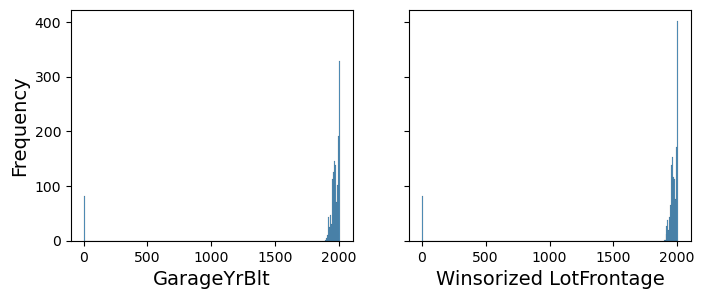

In [262]:
from scipy.stats.mstats import winsorize

# Apply Winsorization to limit extreme values (e.g., 5th and 95th percentile)
housing_data['GarageYrBlt_winsor'] = winsorize(housing_data['GarageYrBlt'], limits=[0.05, 0.05])
# Create figure and subplot
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

# Original plot
sns.histplot(data=housing_data, x='GarageYrBlt', ax=axs[0])
axs[0].set_xlabel('GarageYrBlt')
axs[0].set_ylabel('Frequency')

# Winsorized plot
sns.histplot(data=housing_data, x='GarageYrBlt_winsor', ax=axs[1])
axs[1].set_xlabel('Winsorized LotFrontage')

plt.show()



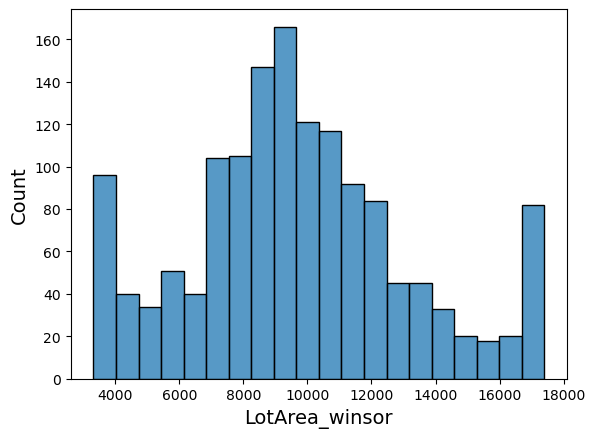

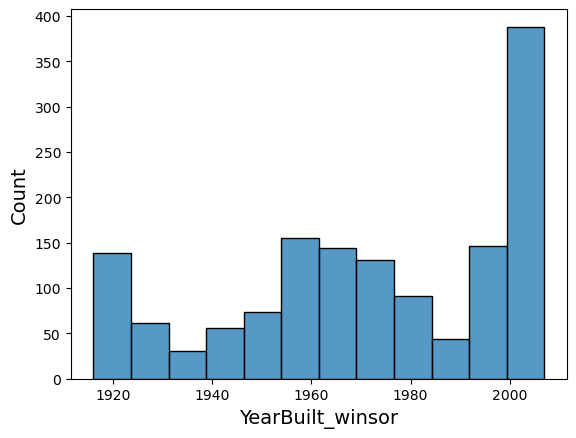

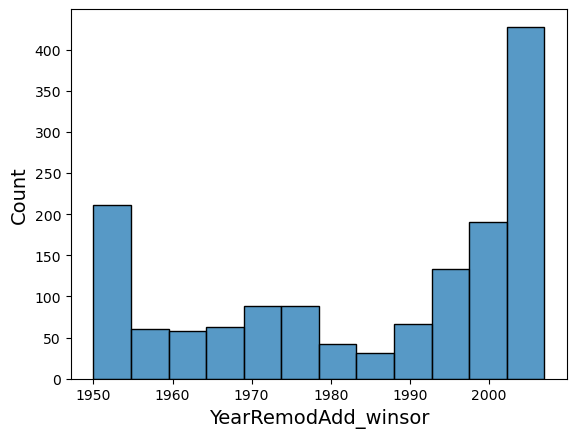

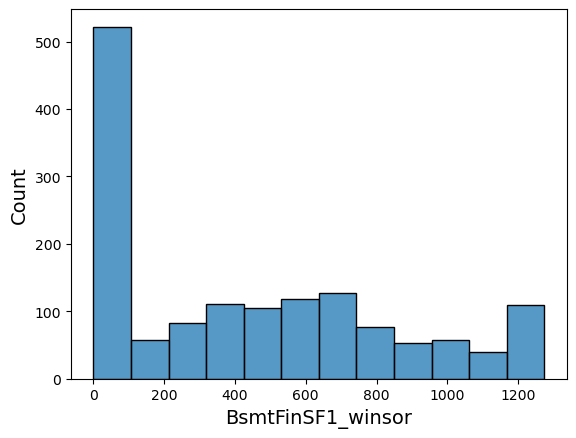

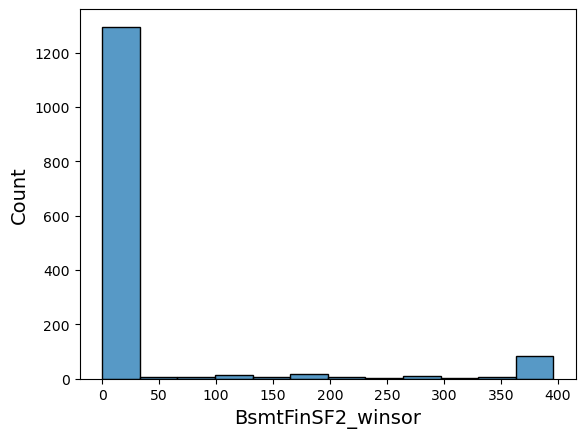

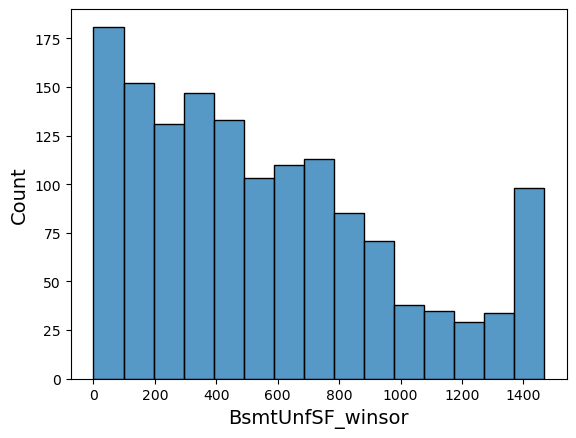

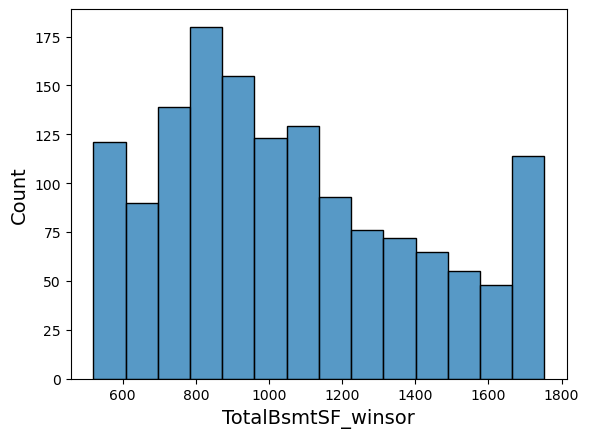

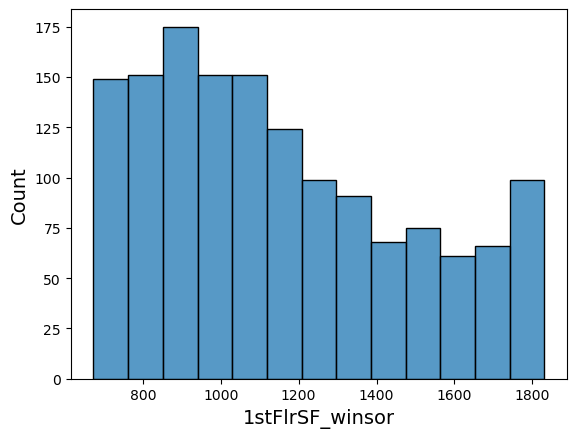

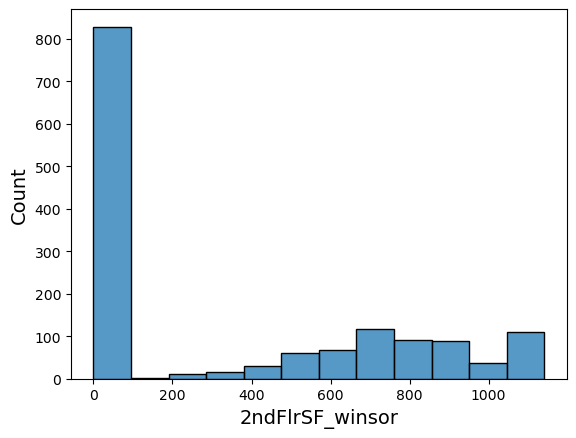

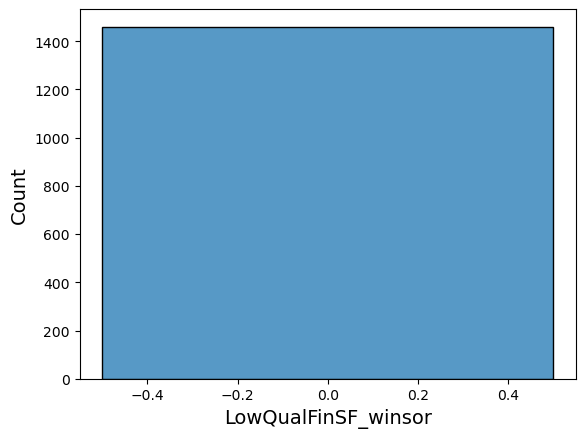

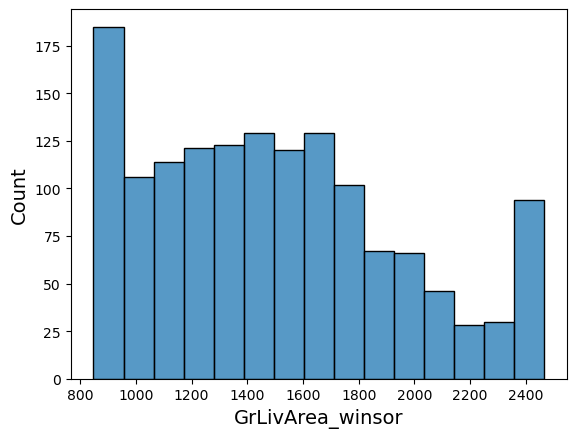

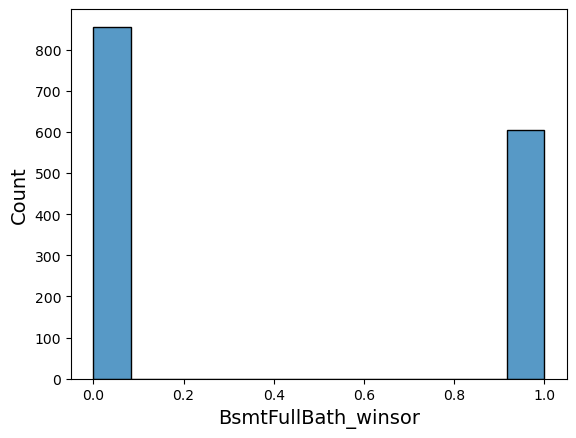

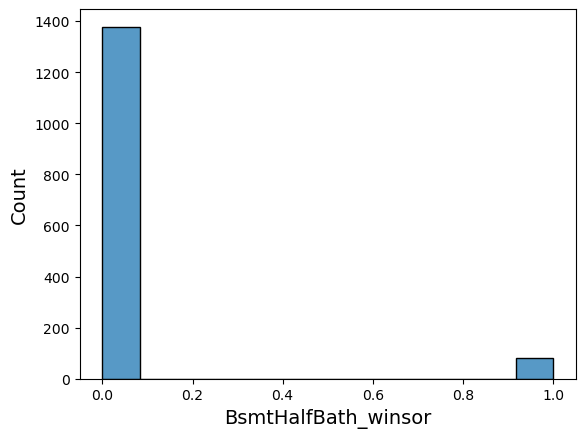

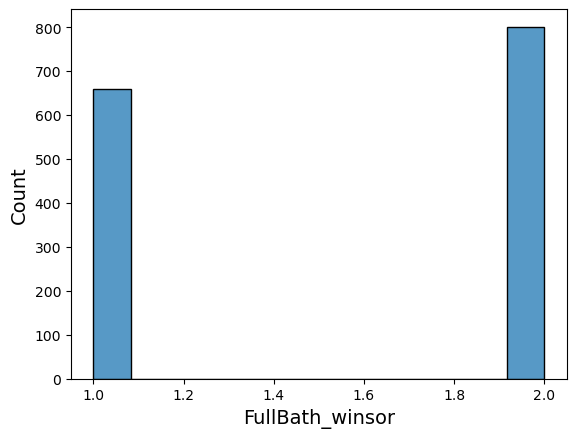

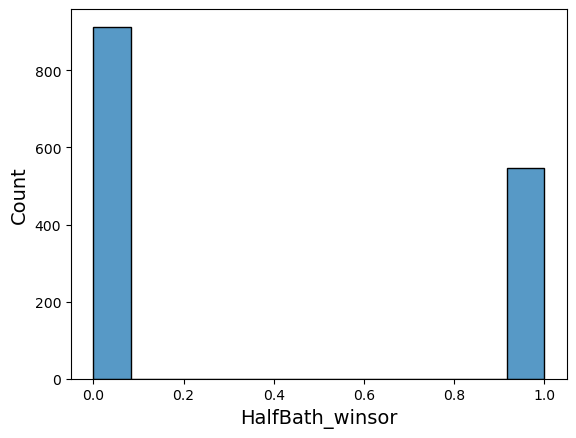

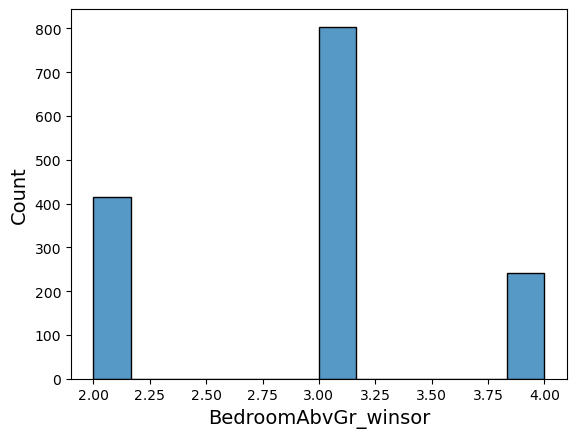

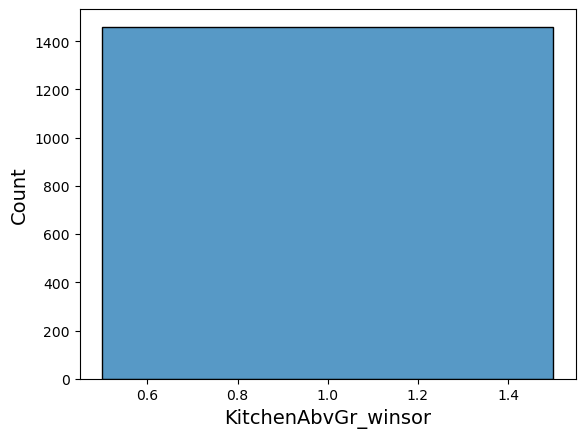

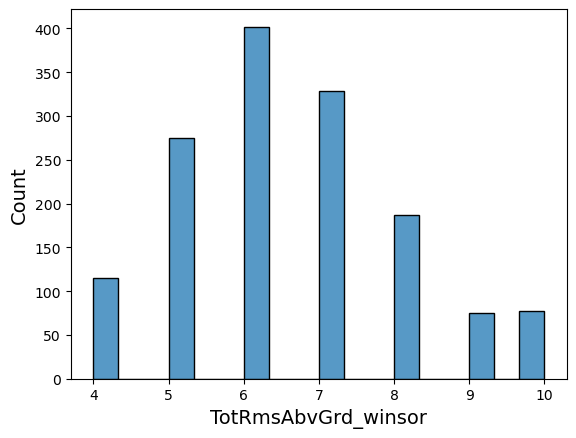

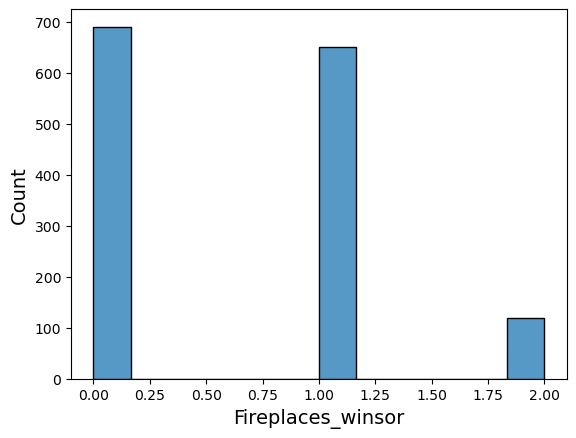

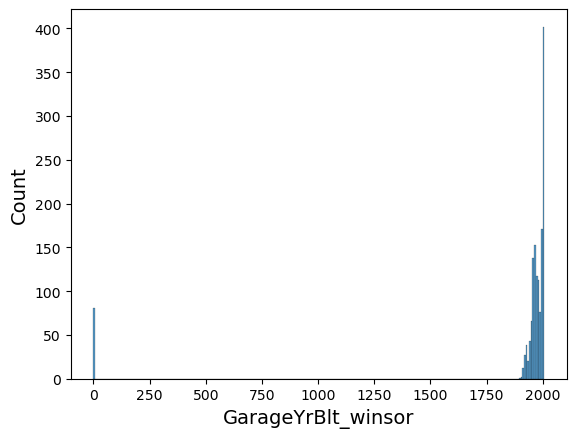

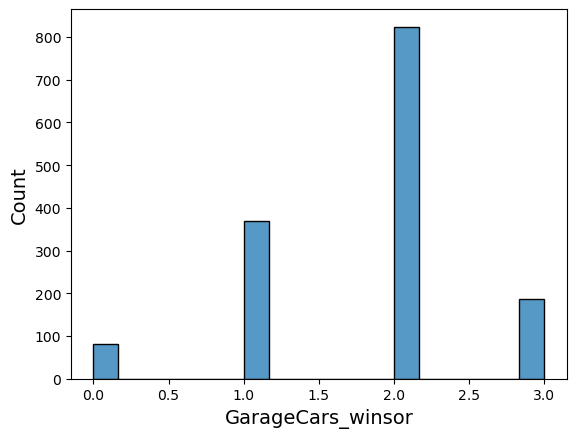

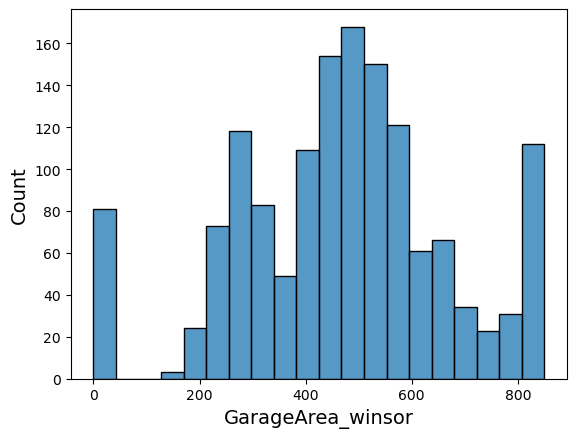

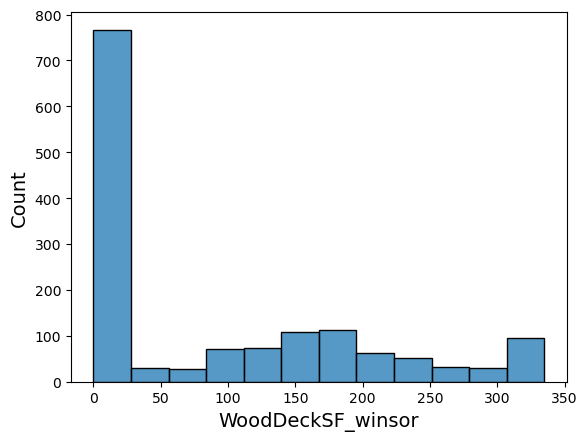

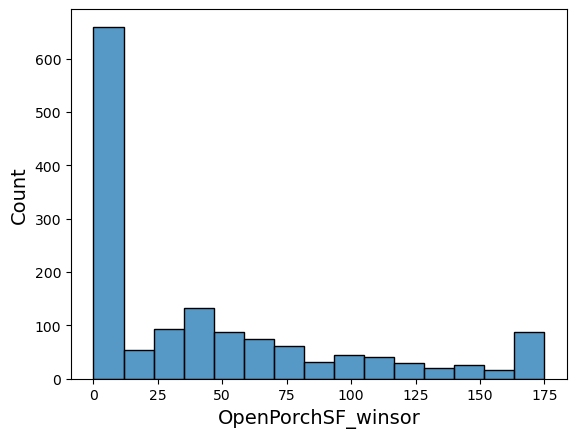

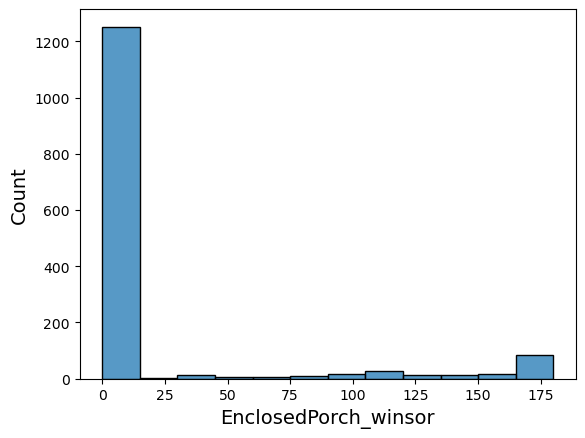

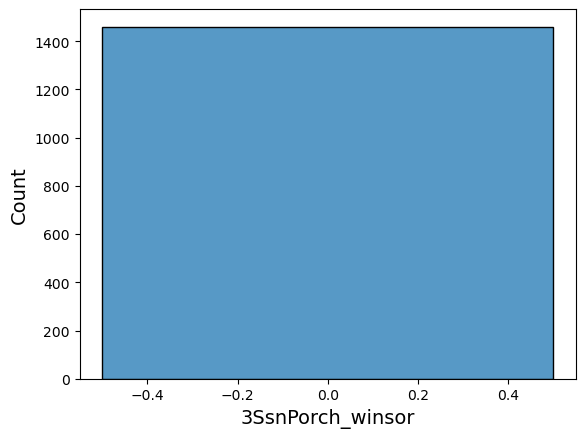

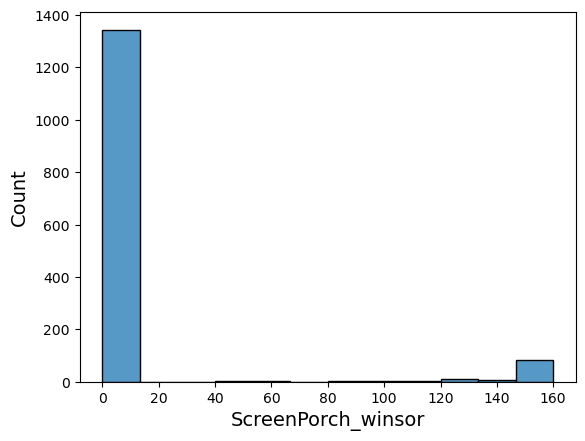

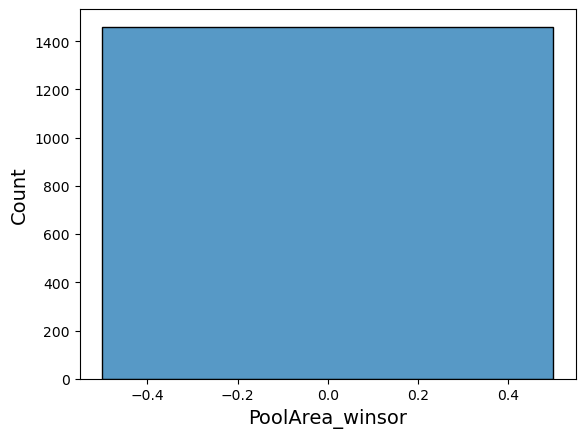

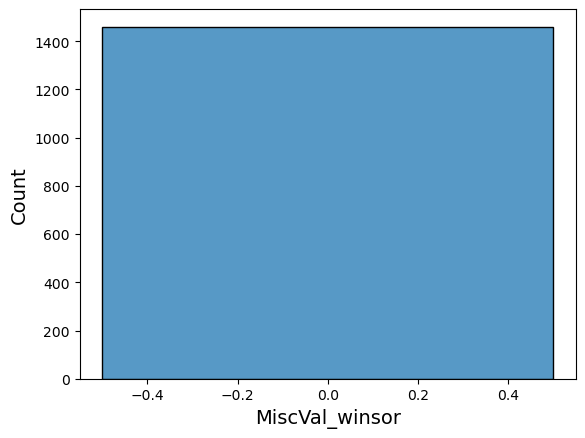

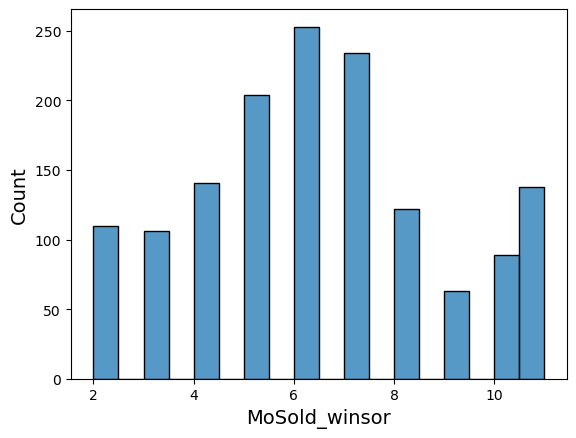

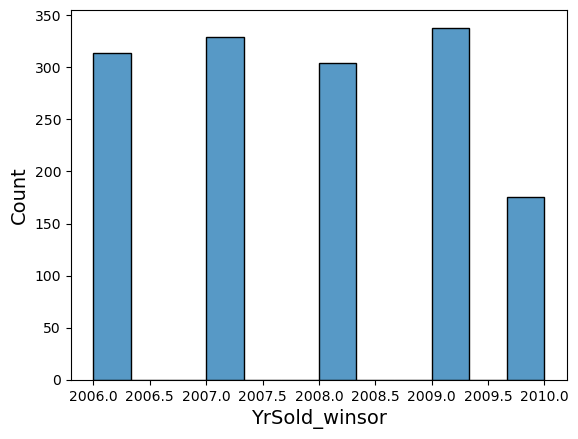

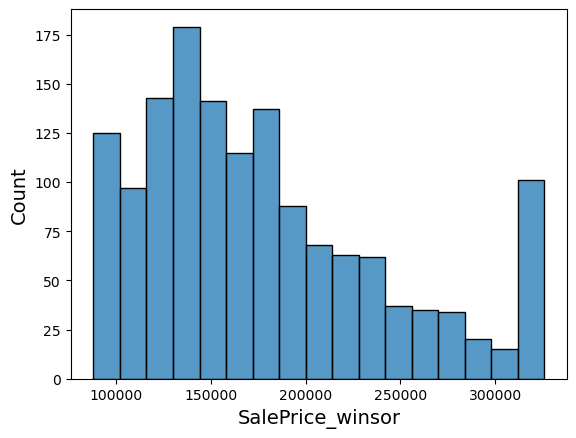

In [258]:
for i in h.columns:
    if i.endswith('_winsor'):
        sns.histplot(data=housing_data_winsor, x=i)
    plt.show()


In [ ]:
for i in housing_data_winsor.columns:
    if i.endswith('_winsor'):